In [1]:
import pandas as pd
import xgboost as xgb
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
import numpy as np
from sklearn.metrics import matthews_corrcoef
from scipy import stats
from sklearn.neighbors import KNeighborsClassifier

In [2]:
df = pd.read_csv("data/IFSalgorithms.csv")

In [3]:
df.iloc[:,0:-1].head()

,MKTLLLTLVVVTIVCLDLGY,WGGQGTPKDATDRCCFVHDCCY,KPGVDIKCCSTDKCN,MFTVFLLVVLATTVV,IVCGKNDPCLRAICECDRAAAICFRENLNTYNKNYMYYSDSRCTEESEQC,CPPGZNJCYKKTWCD,PD019186-interpro,PD045217-interpro,PD192830-interpro,PD226062-interpro,...,hydrophobicity_PRAM900101.2.residue0,DL.gap1-gp1,WK_DDE-gp1,EF_DDE-gp1,PD.gap4-gp1,AK.gap2-gp1,KL.gap0-gp1,NK.gap4-gp1,IV.gap0-gp1,KL_DPC-gp1
0,0,0.0,0,0,0,0,0.0,0,0,0.0,...,4.705882,0.0,4.494977,-0.300658,0.0,0.0,0.0,0.0125,0.000000,0.0
1,0,0.0,0,0,0,0,0.0,0,0,0.0,...,9.090909,0.0,-0.106270,-0.150329,0.0,0.0,0.0,0.0000,0.000000,0.0
2,0,0.0,0,0,0,0,0.0,0,0,0.0,...,50.000000,0.0,-0.083613,-0.118278,0.0,0.0,0.0,0.0000,0.000000,0.0
3,0,0.0,0,0,0,0,0.0,0,0,0.0,...,3.370787,0.0,-0.217542,-0.307734,0.0,0.0,0.0,0.0000,0.000000,0.0
4,1,0.0,0,0,0,0,0.0,0,0,0.0,...,3.448276,0.0,-0.215056,-0.304217,0.0,0.0,0.0,0.0000,0.011628,0.0


In [4]:
# convert all columns of DataFrame
# df = df.iloc[:,0:-1].apply(pd.to_numeric) 
df.columns

Index(['MKTLLLTLVVVTIVCLDLGY', 'WGGQGTPKDATDRCCFVHDCCY', 'KPGVDIKCCSTDKCN',
       'MFTVFLLVVLATTVV', 'IVCGKNDPCLRAICECDRAAAICFRENLNTYNKNYMYYSDSRCTEESEQC',
       'CPPGZNJCYKKTWCD', 'PD019186-interpro', 'PD045217-interpro',
       'PD192830-interpro', 'PD226062-interpro',
       ...
       'DL.gap1-gp1', 'WK_DDE-gp1', 'EF_DDE-gp1', 'PD.gap4-gp1', 'AK.gap2-gp1',
       'KL.gap0-gp1', 'NK.gap4-gp1', 'IV.gap0-gp1', 'KL_DPC-gp1', 'class'],
      dtype='object', length=173)

In [5]:
seed = 19900125
result = {
    "AUC" : [],
    "ACC" : [],
    "MCC" : [],
    "Sp" : [],
    "Sn" : [],
    "Precision_post": [],
    "Precision_pre" : [],
}

for i in range(100):
    seed = seed+i
    
    rf = RandomForestClassifier(n_estimators = 100, random_state=seed)
#     bagging = BaggingClassifier(n_estimators = 100,random_state=seed)
#     ada = AdaBoostClassifier(n_estimators = 100,random_state=seed)
#     tree = DecisionTreeClassifier()
#     nb = GaussianNB()
#     knn = KNeighborsClassifier()
#     xg_classifier = xgb.XGBClassifier(n_estimators=100,max_depth=5)
    
    cv = StratifiedKFold(n_splits=5, random_state=seed, shuffle=True)
    results = pd.DataFrame(columns=['training_score', 'test_score'])
#     seed = seed+1
    X = df.iloc[:,0:-1]
    Y = df.iloc[:,-1]
    
    subresult = {
    "AUC" : [],
    "ACC" : [],
    "MCC" : [],
    "Sp" : [],
    "Sn" : [],
    "Precision_post": [],
    "Precision_pre" : [],
}
#     1 is post, 0 is pre
    for (train, test), i in zip(cv.split(X, Y), range(5)):
        
        rf.fit(X.iloc[train], Y.iloc[train])
        y_pred_test = rf.predict(X.iloc[test]) # predicted class
        y_pred_test_prob = rf.predict_proba(X.iloc[test]) # predicted probability
        
#         bagging.fit(X.iloc[train], Y.iloc[train])
#         y_pred_test = bagging.predict(X.iloc[test]) # predicted class
#         y_pred_test_prob = bagging.predict_proba(X.iloc[test]) # predicted probability
        
#         ada.fit(X.iloc[train], Y.iloc[train])
#         y_pred_test = ada.predict(X.iloc[test]) # predicted class
#         y_pred_test_prob = ada.predict_proba(X.iloc[test]) # predicted probability 
        
#         nb.fit(X.iloc[train], Y.iloc[train])
#         y_pred_test = nb.predict(X.iloc[test]) # predicted class
#         y_pred_test_prob = nb.predict_proba(X.iloc[test]) # predicted probability 
        
#         knn.fit(X.iloc[train], Y.iloc[train])
#         y_pred_test = knn.predict(X.iloc[test]) # predicted class
#         y_pred_test_prob = knn.predict_proba(X.iloc[test]) # predicted probability 
              
#         xg_classifier.fit(X.iloc[train], Y.iloc[train])
#         y_pred_test = xg_classifier.predict(X.iloc[test]) # predicted class
#         y_pred_test_prob = xg_classifier.predict_proba(X.iloc[test]) # predicted probability 
        
          
        fpr, tpr, thresholds = metrics.roc_curve(Y.iloc[test], y_pred_test_prob[:, 1])
        aucresult = metrics.auc(fpr, tpr)
#         print("auc:\t"+ str(aucresult))
        acc = accuracy_score(Y.iloc[test], y_pred_test)
#         print("acc:\t"+ str(acc))
        mcc = matthews_corrcoef(Y.iloc[test], y_pred_test)
        sp_1 = precision_score( Y.iloc[test], y_pred_test,pos_label=1) 
#         print("sp_1:\t"+ str(sp_1))
        sp_0 = precision_score( Y.iloc[test], y_pred_test,pos_label=0) 
#         print("sp_0:\t"+ str(sp_0))
        sn_1 = recall_score( Y.iloc[test], y_pred_test,pos_label=1) 
#         print("sp_1:\t"+ str(sn_1))
        sn_0 = recall_score( Y.iloc[test], y_pred_test,pos_label=0) 
#         print("sn_0:\t"+ str(sn_0))
        
#         print()
        subresult["AUC"].append(aucresult)
        subresult["ACC"].append(acc)
        subresult["MCC"].append(mcc)
        subresult["Sp"].append(sn_1)
        subresult["Sn"].append(sn_0)
        subresult["Precision_post"].append(sp_0)
        subresult["Precision_pre"].append(sp_1)
        
#         print("AUC\t"+str(round(aucresult,3)))
    
    aucmean = round(np.mean(subresult["AUC"]),3)
    accmean = round(np.mean(subresult["ACC"]),3)
    mccmean = round(np.mean(subresult["MCC"]),3)
    spmean = round(np.mean(subresult["Sp"]),3)
    snmean = round(np.mean(subresult["Sn"]),3)
    precisionPostmean = round(np.mean(subresult["Precision_post"]),3)
    precisionPremean = round(np.mean(subresult["Precision_pre"]),3)
       
    result["AUC"].append(aucmean)
    result["ACC"].append(accmean)
    result["MCC"].append(mccmean)
    result["Sp"].append(spmean)
    result["Sn"].append(snmean)
    result["Precision_post"].append(precisionPostmean)
    result["Precision_pre"].append(precisionPremean)
        
print("metrics\tmean\tstd\terror")
for key, value in result.items():  
    print(key+"\t"+str(round(np.mean(value),3))+"\t"+str(round(np.std(value),3))+"\t"+str(round(stats.sem(value),3)))
print()
for key, value in result.items():  
    print(key+"\t"+str(value))
# print(result)

metrics	mean	std	error
AUC	0.96	0.005	0.0
ACC	0.916	0.009	0.001
MCC	0.833	0.017	0.002
Sp	0.914	0.014	0.001
Sn	0.917	0.012	0.001
Precision_post	0.917	0.012	0.001
Precision_pre	0.919	0.011	0.001

AUC	[0.967, 0.956, 0.966, 0.962, 0.963, 0.96, 0.958, 0.963, 0.957, 0.966, 0.958, 0.963, 0.96, 0.951, 0.959, 0.954, 0.956, 0.969, 0.971, 0.962, 0.959, 0.964, 0.961, 0.959, 0.954, 0.968, 0.965, 0.95, 0.956, 0.963, 0.96, 0.962, 0.957, 0.963, 0.966, 0.952, 0.965, 0.966, 0.963, 0.955, 0.954, 0.953, 0.962, 0.955, 0.959, 0.959, 0.956, 0.966, 0.964, 0.955, 0.961, 0.956, 0.955, 0.966, 0.959, 0.958, 0.962, 0.962, 0.962, 0.962, 0.962, 0.964, 0.959, 0.954, 0.955, 0.951, 0.958, 0.955, 0.962, 0.967, 0.953, 0.958, 0.95, 0.956, 0.956, 0.961, 0.963, 0.959, 0.96, 0.958, 0.961, 0.962, 0.966, 0.956, 0.956, 0.965, 0.959, 0.959, 0.955, 0.958, 0.962, 0.957, 0.957, 0.961, 0.965, 0.954, 0.964, 0.951, 0.961, 0.957]
ACC	[0.925, 0.918, 0.927, 0.915, 0.919, 0.912, 0.921, 0.924, 0.903, 0.912, 0.906, 0.918, 0.918, 0.909, 0.90

In [92]:
df_Motif = df.iloc[:,70:173]

In [94]:
df_Motif.columns

Index(['Pc1.C', 'MF_DDE-gp1', 'FV_DDE-gp1', 'AL.gap1-gp1', 'CK_DDE-gp1',
       'GG.gap3-gp1', 'SP_DDE-gp1', 'CP_DDE-gp1', 'AT_DDE-gp1', 'LV.gap3-gp1',
       ...
       'DL.gap1-gp1', 'WK_DDE-gp1', 'EF_DDE-gp1', 'PD.gap4-gp1', 'AK.gap2-gp1',
       'KL.gap0-gp1', 'NK.gap4-gp1', 'IV.gap0-gp1', 'KL_DPC-gp1', 'class'],
      dtype='object', length=103)

In [57]:
df_APAAC = df
df_APAAC = df.drop("Pc1.C",axis=1) # 去除 APAAC
len(df_APAAC.columns)

172

In [66]:
df_CKSAAGP = df
name = ["aromatic.aromatic.gap1","1ivecharger.aromatic.gap4"]

for n in name:
    if n in df_CKSAAGP.columns:
        print(n)
    df_CKSAAGP = df_CKSAAGP.drop(n,axis = 1)
print(len(df_CKSAAGP.columns))

aromatic.aromatic.gap1
1ivecharger.aromatic.gap4
171


In [55]:
df_CKSAAP = df
name = ["AL.gap1","GG.gap3","LV.gap3","ML.gap5","GC.gap2","VV.gap0","TV.gap1","LL.gap3","PK.gap2","VT.gap2","SL.gap1","GD.gap3","LI.gap5","LS.gap4","GG.gap4","AF.gap2","CP.gap2","VV.gap5","VG.gap2","VL.gap0","GP.gap5","DN.gap2","TV.gap3","DL.gap1","PD.gap4","AK.gap2","KL.gap0","NK.gap4","IV.gap0"]

for n in name:
    n = n+"-gp1"
    df_CKSAAP = df_CKSAAP.drop(n,axis = 1)
print(len(df_CKSAAP.columns))

144


In [50]:
df_CTDD = df

for t in df.columns:
    if "hydrophobicity_ENGD860101.1.residue0" in t:
        df_CTDD = df_CTDD.drop(t, axis = 1)
    elif "polarity.3.residue0" in t:
        df_CTDD = df_CTDD.drop(t, axis = 1)
    elif "ydrophobicity_PRAM900101.2.residue0" in t:
        df_CTDD = df_CTDD.drop(t, axis = 1)
len(df_CTDD.columns)

170

In [42]:
df_DDE = df

for t in df.columns:
    if "_DDE" in t:
        df_DDE = df_DDE.drop(t, axis = 1)
len(df_DDE.columns)


115

In [46]:
df_DPC = df

for t in df.columns:
    if "_DPC" in t:
        df_DPC = df_DPC.drop(t, axis = 1)
len(df_DPC.columns)

168

In [48]:
df_GTPC = df

for t in df.columns:
    if "negativecharger.negativecharger.uncharger" in t:
        df_GTPC = df_GTPC.drop(t, axis = 1)
    elif "aromatic.uncharger.aromatic" in t:
        df_GTPC = df_GTPC.drop(t, axis = 1)
    elif "alphaticr.negativecharger.negativecharger" in t:
        df_GTPC = df_GTPC.drop(t, axis = 1)
len(df_GTPC.columns)

170

In [49]:
df_NMBROTO = df
df_NMBROTO = df_NMBROTO.drop("CHAM820101.lag5nmbroto",axis = 1)
len(df_NMBROTO.columns)

172

In [100]:
df_list = [df_Motif, df_APAAC, df_CKSAAGP, df_CKSAAP, df_CTDD, df_DDE, df_DPC, df_GTPC, df]
len(df_list)

9

In [23]:
def get_df_name(df):
    name =[x for x in globals() if globals()[x] is df][0]
    return name

In [102]:
for d in df_list:
    print("\n"+get_df_name(d)+"\t"+str(len(d.columns)))
    seed = 19900125
    result = {
        "AUC" : [],
        "ACC" : [],
        "MCC" : [],
        "Sp" : [],
        "Sn" : [],
        "Precision_post": [],
        "Precision_pre" : [],
    }

    for i in range(100):
        seed = seed+i
    
        xg_classifier = xgb.XGBClassifier(n_estimators=100,max_depth=5)
    
        cv = StratifiedKFold(n_splits=5, random_state=seed, shuffle=True)
        seed = seed+1
        X = d.iloc[:,0:-1]
        Y = d.iloc[:,-1]
    
        subresult = {
        "AUC" : [],
        "ACC" : [],
        "MCC" : [],
        "Sp" : [],
        "Sn" : [],
        "Precision_post": [],
        "Precision_pre" : [],
    }
#     1 is post, 0 is pre
        for (train, test), i in zip(cv.split(X, Y), range(5)):         
            xg_classifier.fit(X.iloc[train], Y.iloc[train])
            y_pred_test = xg_classifier.predict(X.iloc[test]) # predicted class
            y_pred_test_prob = xg_classifier.predict_proba(X.iloc[test]) # predicted probability 


            fpr, tpr, thresholds = metrics.roc_curve(Y.iloc[test], y_pred_test_prob[:, 1])
            aucresult = metrics.auc(fpr, tpr)
            acc = accuracy_score(Y.iloc[test], y_pred_test)
            mcc = matthews_corrcoef(Y.iloc[test], y_pred_test)
            sp_1 = precision_score( Y.iloc[test], y_pred_test,pos_label=1) 
            sp_0 = precision_score( Y.iloc[test], y_pred_test,pos_label=0) 
            sn_1 = recall_score( Y.iloc[test], y_pred_test,pos_label=1) 
            sn_0 = recall_score( Y.iloc[test], y_pred_test,pos_label=0) 

    #         print()
            subresult["AUC"].append(aucresult)
            subresult["ACC"].append(acc)
            subresult["MCC"].append(mcc)
            subresult["Sp"].append(sn_1)
            subresult["Sn"].append(sn_0)
            subresult["Precision_post"].append(sp_0)
            subresult["Precision_pre"].append(sp_1)

        aucmean = round(np.mean(subresult["AUC"]),3)
        accmean = round(np.mean(subresult["ACC"]),3)
        mccmean = round(np.mean(subresult["MCC"]),3)
        spmean = round(np.mean(subresult["Sp"]),3)
        snmean = round(np.mean(subresult["Sn"]),3)
        precisionPostmean = round(np.mean(subresult["Precision_post"]),3)
        precisionPremean = round(np.mean(subresult["Precision_pre"]),3)

        result["AUC"].append(aucmean)
        result["ACC"].append(accmean)
        result["MCC"].append(mccmean)
        result["Sp"].append(spmean)
        result["Sn"].append(snmean)
        result["Precision_post"].append(precisionPostmean)
        result["Precision_pre"].append(precisionPremean)
        
    print("metrics\tmean\tstd\terror")
    for key, value in result.items():  
        print(key+"\t"+str(round(np.mean(value),3))+"\t"+str(round(np.std(value),3))+"\t"+str(round(stats.sem(value),3)))
    print()
    for key, value in result.items():  
        print(key+"\t"+str(value))
    # print(result)


df_Motif	103
metrics	mean	std	error
AUC	0.963	0.005	0.0
ACC	0.903	0.01	0.001
MCC	0.809	0.019	0.002
Sp	0.9	0.014	0.001
Sn	0.906	0.014	0.001
Precision_post	0.903	0.012	0.001
Precision_pre	0.908	0.013	0.001

AUC	[0.967, 0.972, 0.964, 0.955, 0.964, 0.959, 0.969, 0.959, 0.966, 0.961, 0.969, 0.969, 0.968, 0.967, 0.959, 0.971, 0.962, 0.964, 0.964, 0.96, 0.955, 0.962, 0.961, 0.963, 0.967, 0.961, 0.966, 0.968, 0.967, 0.964, 0.965, 0.957, 0.966, 0.963, 0.957, 0.96, 0.967, 0.963, 0.956, 0.973, 0.964, 0.962, 0.972, 0.964, 0.971, 0.96, 0.956, 0.964, 0.963, 0.968, 0.956, 0.959, 0.962, 0.957, 0.958, 0.962, 0.954, 0.962, 0.954, 0.956, 0.961, 0.956, 0.97, 0.958, 0.966, 0.965, 0.959, 0.964, 0.964, 0.958, 0.956, 0.962, 0.97, 0.961, 0.961, 0.961, 0.965, 0.968, 0.966, 0.968, 0.958, 0.959, 0.964, 0.959, 0.961, 0.956, 0.961, 0.968, 0.964, 0.958, 0.958, 0.966, 0.961, 0.959, 0.959, 0.966, 0.961, 0.965, 0.955, 0.964]
ACC	[0.899, 0.911, 0.921, 0.896, 0.899, 0.912, 0.912, 0.896, 0.896, 0.912, 0.906, 0.905, 0.903

metrics	mean	std	error
AUC	0.965	0.005	0.0
ACC	0.903	0.01	0.001
MCC	0.808	0.02	0.002
Sp	0.902	0.013	0.001
Sn	0.903	0.016	0.002
Precision_post	0.905	0.012	0.001
Precision_pre	0.906	0.014	0.001

AUC	[0.969, 0.973, 0.968, 0.957, 0.965, 0.959, 0.969, 0.957, 0.969, 0.968, 0.968, 0.97, 0.972, 0.969, 0.958, 0.974, 0.965, 0.965, 0.967, 0.963, 0.961, 0.968, 0.965, 0.965, 0.972, 0.959, 0.97, 0.97, 0.965, 0.967, 0.964, 0.961, 0.969, 0.966, 0.96, 0.964, 0.969, 0.962, 0.96, 0.974, 0.964, 0.962, 0.975, 0.961, 0.966, 0.961, 0.962, 0.966, 0.965, 0.967, 0.957, 0.957, 0.964, 0.96, 0.961, 0.965, 0.96, 0.962, 0.958, 0.957, 0.962, 0.96, 0.976, 0.963, 0.971, 0.964, 0.967, 0.964, 0.969, 0.958, 0.956, 0.963, 0.967, 0.963, 0.96, 0.969, 0.967, 0.967, 0.966, 0.968, 0.959, 0.964, 0.962, 0.96, 0.964, 0.956, 0.967, 0.971, 0.962, 0.965, 0.958, 0.962, 0.966, 0.961, 0.965, 0.969, 0.966, 0.967, 0.958, 0.964]
ACC	[0.893, 0.902, 0.937, 0.909, 0.893, 0.906, 0.906, 0.892, 0.899, 0.912, 0.89, 0.899, 0.915, 0.909, 0.884, 0.8

metrics	mean	std	error
AUC	0.964	0.005	0.0
ACC	0.903	0.01	0.001
MCC	0.81	0.02	0.002
Sp	0.903	0.014	0.001
Sn	0.904	0.014	0.001
Precision_post	0.905	0.013	0.001
Precision_pre	0.907	0.013	0.001

AUC	[0.967, 0.971, 0.966, 0.958, 0.965, 0.961, 0.969, 0.957, 0.969, 0.965, 0.969, 0.967, 0.969, 0.967, 0.955, 0.972, 0.967, 0.965, 0.967, 0.963, 0.96, 0.963, 0.963, 0.96, 0.968, 0.959, 0.967, 0.97, 0.968, 0.965, 0.97, 0.958, 0.971, 0.966, 0.958, 0.966, 0.973, 0.961, 0.956, 0.974, 0.965, 0.964, 0.974, 0.963, 0.971, 0.964, 0.959, 0.966, 0.963, 0.967, 0.953, 0.962, 0.964, 0.96, 0.957, 0.961, 0.958, 0.963, 0.957, 0.961, 0.964, 0.959, 0.97, 0.959, 0.969, 0.964, 0.965, 0.967, 0.971, 0.956, 0.962, 0.966, 0.971, 0.965, 0.962, 0.961, 0.965, 0.969, 0.965, 0.964, 0.959, 0.96, 0.965, 0.958, 0.965, 0.96, 0.964, 0.974, 0.957, 0.961, 0.96, 0.963, 0.962, 0.958, 0.962, 0.968, 0.965, 0.966, 0.954, 0.964]
ACC	[0.893, 0.899, 0.918, 0.899, 0.896, 0.912, 0.909, 0.893, 0.899, 0.918, 0.899, 0.903, 0.921, 0.918, 0.887, 0.

metrics	mean	std	error
AUC	0.965	0.004	0.0
ACC	0.908	0.011	0.001
MCC	0.818	0.021	0.002
Sp	0.905	0.013	0.001
Sn	0.91	0.015	0.001
Precision_post	0.908	0.012	0.001
Precision_pre	0.912	0.013	0.001

AUC	[0.969, 0.973, 0.965, 0.958, 0.967, 0.961, 0.971, 0.959, 0.97, 0.968, 0.972, 0.969, 0.973, 0.97, 0.958, 0.975, 0.966, 0.964, 0.967, 0.964, 0.963, 0.964, 0.966, 0.964, 0.969, 0.96, 0.97, 0.972, 0.969, 0.968, 0.967, 0.96, 0.973, 0.967, 0.962, 0.964, 0.973, 0.959, 0.959, 0.973, 0.965, 0.966, 0.976, 0.965, 0.971, 0.965, 0.964, 0.965, 0.965, 0.969, 0.958, 0.963, 0.966, 0.962, 0.961, 0.966, 0.961, 0.966, 0.958, 0.96, 0.965, 0.959, 0.972, 0.961, 0.97, 0.966, 0.965, 0.969, 0.97, 0.959, 0.96, 0.962, 0.972, 0.963, 0.962, 0.964, 0.969, 0.968, 0.967, 0.968, 0.961, 0.961, 0.965, 0.961, 0.965, 0.963, 0.968, 0.972, 0.963, 0.962, 0.959, 0.965, 0.964, 0.963, 0.961, 0.97, 0.967, 0.967, 0.955, 0.965]
ACC	[0.899, 0.912, 0.924, 0.909, 0.899, 0.912, 0.921, 0.902, 0.893, 0.931, 0.909, 0.903, 0.918, 0.915, 0.903, 0

metrics	mean	std	error
AUC	0.965	0.005	0.0
ACC	0.908	0.011	0.001
MCC	0.818	0.022	0.002
Sp	0.905	0.014	0.001
Sn	0.911	0.015	0.002
Precision_post	0.908	0.013	0.001
Precision_pre	0.913	0.014	0.001

AUC	[0.971, 0.972, 0.965, 0.958, 0.966, 0.962, 0.973, 0.955, 0.969, 0.968, 0.971, 0.969, 0.972, 0.97, 0.96, 0.973, 0.966, 0.963, 0.968, 0.961, 0.962, 0.964, 0.964, 0.962, 0.969, 0.961, 0.971, 0.97, 0.969, 0.966, 0.968, 0.96, 0.972, 0.967, 0.961, 0.966, 0.972, 0.964, 0.959, 0.976, 0.963, 0.966, 0.975, 0.961, 0.972, 0.966, 0.963, 0.965, 0.964, 0.969, 0.96, 0.963, 0.964, 0.962, 0.962, 0.967, 0.959, 0.964, 0.956, 0.962, 0.965, 0.958, 0.972, 0.961, 0.972, 0.968, 0.964, 0.969, 0.97, 0.957, 0.96, 0.965, 0.972, 0.965, 0.962, 0.964, 0.969, 0.971, 0.969, 0.97, 0.961, 0.964, 0.967, 0.959, 0.966, 0.962, 0.967, 0.972, 0.959, 0.96, 0.959, 0.961, 0.964, 0.964, 0.963, 0.968, 0.967, 0.967, 0.956, 0.965]
ACC	[0.906, 0.899, 0.924, 0.902, 0.899, 0.909, 0.922, 0.899, 0.906, 0.931, 0.903, 0.903, 0.922, 0.918, 0.9, 0

In [40]:
df_1 = pd.DataFrame()
df_1["Motif"] = [0.967, 0.972, 0.964, 0.955, 0.964, 0.959, 0.969, 0.959, 0.966, 0.961, 0.969, 0.969, 0.968, 0.967, 0.959, 0.971, 0.962, 0.964, 0.964, 0.96, 0.955, 0.962, 0.961, 0.963, 0.967, 0.961, 0.966, 0.968, 0.967, 0.964, 0.965, 0.957, 0.966, 0.963, 0.957, 0.96, 0.967, 0.963, 0.956, 0.973, 0.964, 0.962, 0.972, 0.964, 0.971, 0.96, 0.956, 0.964, 0.963, 0.968, 0.956, 0.959, 0.962, 0.957, 0.958, 0.962, 0.954, 0.962, 0.954, 0.956, 0.961, 0.956, 0.97, 0.958, 0.966, 0.965, 0.959, 0.964, 0.964, 0.958, 0.956, 0.962, 0.97, 0.961, 0.961, 0.961, 0.965, 0.968, 0.966, 0.968, 0.958, 0.959, 0.964, 0.959, 0.961, 0.956, 0.961, 0.968, 0.964, 0.958, 0.958, 0.966, 0.961, 0.959, 0.959, 0.966, 0.961, 0.965, 0.955, 0.964]
df_1["APAAC"] = [0.971, 0.973, 0.966, 0.958, 0.965, 0.962, 0.974, 0.959, 0.969, 0.968, 0.973, 0.972, 0.975, 0.97, 0.96, 0.973, 0.966, 0.967, 0.969, 0.963, 0.961, 0.962, 0.964, 0.965, 0.969, 0.962, 0.973, 0.971, 0.97, 0.965, 0.967, 0.964, 0.971, 0.968, 0.962, 0.965, 0.972, 0.962, 0.959, 0.973, 0.964, 0.967, 0.978, 0.964, 0.971, 0.966, 0.962, 0.967, 0.965, 0.967, 0.958, 0.96, 0.965, 0.962, 0.962, 0.967, 0.96, 0.966, 0.961, 0.962, 0.966, 0.958, 0.976, 0.96, 0.975, 0.967, 0.963, 0.967, 0.969, 0.959, 0.96, 0.965, 0.973, 0.964, 0.964, 0.963, 0.969, 0.97, 0.968, 0.969, 0.96, 0.961, 0.966, 0.962, 0.966, 0.965, 0.965, 0.974, 0.962, 0.958, 0.964, 0.963, 0.965, 0.966, 0.965, 0.97, 0.969, 0.967, 0.957, 0.964]
df_1["CKSAAGP"] = [0.969, 0.973, 0.968, 0.957, 0.965, 0.959, 0.969, 0.957, 0.969, 0.968, 0.968, 0.97, 0.972, 0.969, 0.958, 0.974, 0.965, 0.965, 0.967, 0.963, 0.961, 0.968, 0.965, 0.965, 0.972, 0.959, 0.97, 0.97, 0.965, 0.967, 0.964, 0.961, 0.969, 0.966, 0.96, 0.964, 0.969, 0.962, 0.96, 0.974, 0.964, 0.962, 0.975, 0.961, 0.966, 0.961, 0.962, 0.966, 0.965, 0.967, 0.957, 0.957, 0.964, 0.96, 0.961, 0.965, 0.96, 0.962, 0.958, 0.957, 0.962, 0.96, 0.976, 0.963, 0.971, 0.964, 0.967, 0.964, 0.969, 0.958, 0.956, 0.963, 0.967, 0.963, 0.96, 0.969, 0.967, 0.967, 0.966, 0.968, 0.959, 0.964, 0.962, 0.96, 0.964, 0.956, 0.967, 0.971, 0.962, 0.965, 0.958, 0.962, 0.966, 0.961, 0.965, 0.969, 0.966, 0.967, 0.958, 0.964]
df_1["CKSAAP"] = [0.965, 0.96, 0.954, 0.954, 0.951, 0.949, 0.959, 0.954, 0.958, 0.963, 0.956, 0.966, 0.964, 0.959, 0.962, 0.961, 0.955, 0.958, 0.952, 0.954, 0.953, 0.957, 0.955, 0.948, 0.963, 0.953, 0.955, 0.965, 0.955, 0.949, 0.958, 0.95, 0.962, 0.961, 0.956, 0.955, 0.963, 0.951, 0.955, 0.962, 0.953, 0.96, 0.956, 0.945, 0.956, 0.96, 0.955, 0.963, 0.953, 0.965, 0.947, 0.958, 0.961, 0.953, 0.952, 0.96, 0.954, 0.952, 0.947, 0.949, 0.961, 0.95, 0.965, 0.944, 0.96, 0.955, 0.957, 0.959, 0.956, 0.951, 0.95, 0.958, 0.957, 0.949, 0.959, 0.958, 0.953, 0.961, 0.957, 0.956, 0.96, 0.958, 0.955, 0.956, 0.957, 0.947, 0.953, 0.957, 0.955, 0.946, 0.947, 0.955, 0.954, 0.949, 0.959, 0.955, 0.953, 0.967, 0.954, 0.956]
df_1["CTDD"] = [0.967, 0.971, 0.966, 0.958, 0.965, 0.961, 0.969, 0.957, 0.969, 0.965, 0.969, 0.967, 0.969, 0.967, 0.955, 0.972, 0.967, 0.965, 0.967, 0.963, 0.96, 0.963, 0.963, 0.96, 0.968, 0.959, 0.967, 0.97, 0.968, 0.965, 0.97, 0.958, 0.971, 0.966, 0.958, 0.966, 0.973, 0.961, 0.956, 0.974, 0.965, 0.964, 0.974, 0.963, 0.971, 0.964, 0.959, 0.966, 0.963, 0.967, 0.953, 0.962, 0.964, 0.96, 0.957, 0.961, 0.958, 0.963, 0.957, 0.961, 0.964, 0.959, 0.97, 0.959, 0.969, 0.964, 0.965, 0.967, 0.971, 0.956, 0.962, 0.966, 0.971, 0.965, 0.962, 0.961, 0.965, 0.969, 0.965, 0.964, 0.959, 0.96, 0.965, 0.958, 0.965, 0.96, 0.964, 0.974, 0.957, 0.961, 0.96, 0.963, 0.962, 0.958, 0.962, 0.968, 0.965, 0.966, 0.954, 0.964]
df_1["DDE"] = [0.969, 0.971, 0.968, 0.958, 0.964, 0.957, 0.973, 0.959, 0.966, 0.964, 0.972, 0.966, 0.974, 0.968, 0.955, 0.976, 0.967, 0.958, 0.969, 0.966, 0.972, 0.963, 0.968, 0.965, 0.969, 0.964, 0.968, 0.973, 0.968, 0.966, 0.971, 0.966, 0.966, 0.968, 0.961, 0.965, 0.968, 0.97, 0.964, 0.972, 0.962, 0.965, 0.966, 0.967, 0.971, 0.966, 0.965, 0.965, 0.968, 0.96, 0.959, 0.962, 0.969, 0.962, 0.956, 0.966, 0.966, 0.969, 0.958, 0.961, 0.959, 0.961, 0.967, 0.963, 0.97, 0.964, 0.963, 0.964, 0.972, 0.957, 0.961, 0.957, 0.971, 0.963, 0.966, 0.968, 0.964, 0.971, 0.964, 0.965, 0.96, 0.962, 0.966, 0.961, 0.966, 0.962, 0.965, 0.963, 0.962, 0.959, 0.961, 0.963, 0.968, 0.962, 0.963, 0.967, 0.964, 0.956, 0.958, 0.972]
df_1["DPC"] = [0.969, 0.973, 0.965, 0.958, 0.967, 0.961, 0.971, 0.959, 0.97, 0.968, 0.972, 0.969, 0.973, 0.97, 0.958, 0.975, 0.966, 0.964, 0.967, 0.964, 0.963, 0.964, 0.966, 0.964, 0.969, 0.96, 0.97, 0.972, 0.969, 0.968, 0.967, 0.96, 0.973, 0.967, 0.962, 0.964, 0.973, 0.959, 0.959, 0.973, 0.965, 0.966, 0.976, 0.965, 0.971, 0.965, 0.964, 0.965, 0.965, 0.969, 0.958, 0.963, 0.966, 0.962, 0.961, 0.966, 0.961, 0.966, 0.958, 0.96, 0.965, 0.959, 0.972, 0.961, 0.97, 0.966, 0.965, 0.969, 0.97, 0.959, 0.96, 0.962, 0.972, 0.963, 0.962, 0.964, 0.969, 0.968, 0.967, 0.968, 0.961, 0.961, 0.965, 0.961, 0.965, 0.963, 0.968, 0.972, 0.963, 0.962, 0.959, 0.965, 0.964, 0.963, 0.961, 0.97, 0.967, 0.967, 0.955, 0.965]
df_1["GTPC"] = [0.97, 0.973, 0.967, 0.961, 0.967, 0.963, 0.973, 0.957, 0.971, 0.968, 0.971, 0.969, 0.974, 0.971, 0.96, 0.973, 0.969, 0.966, 0.968, 0.964, 0.965, 0.964, 0.966, 0.963, 0.968, 0.962, 0.971, 0.969, 0.97, 0.968, 0.966, 0.958, 0.971, 0.968, 0.962, 0.967, 0.973, 0.964, 0.96, 0.974, 0.965, 0.968, 0.976, 0.965, 0.972, 0.964, 0.967, 0.966, 0.965, 0.966, 0.959, 0.964, 0.968, 0.964, 0.959, 0.967, 0.962, 0.968, 0.959, 0.963, 0.965, 0.957, 0.974, 0.96, 0.973, 0.967, 0.964, 0.966, 0.967, 0.959, 0.963, 0.964, 0.97, 0.965, 0.962, 0.966, 0.967, 0.97, 0.969, 0.969, 0.961, 0.962, 0.966, 0.965, 0.963, 0.959, 0.965, 0.973, 0.959, 0.963, 0.96, 0.964, 0.965, 0.961, 0.965, 0.97, 0.967, 0.966, 0.955, 0.967]
df_1["ALL"] = [0.971, 0.972, 0.965, 0.958, 0.966, 0.962, 0.973, 0.955, 0.969, 0.968, 0.971, 0.969, 0.972, 0.97, 0.96, 0.973, 0.966, 0.963, 0.968, 0.961, 0.962, 0.964, 0.964, 0.962, 0.969, 0.961, 0.971, 0.97, 0.969, 0.966, 0.968, 0.96, 0.972, 0.967, 0.961, 0.966, 0.972, 0.964, 0.959, 0.976, 0.963, 0.966, 0.975, 0.961, 0.972, 0.966, 0.963, 0.965, 0.964, 0.969, 0.96, 0.963, 0.964, 0.962, 0.962, 0.967, 0.959, 0.964, 0.956, 0.962, 0.965, 0.958, 0.972, 0.961, 0.972, 0.968, 0.964, 0.969, 0.97, 0.957, 0.96, 0.965, 0.972, 0.965, 0.962, 0.964, 0.969, 0.971, 0.969, 0.97, 0.961, 0.964, 0.967, 0.959, 0.966, 0.962, 0.967, 0.972, 0.959, 0.96, 0.959, 0.961, 0.964, 0.964, 0.963, 0.968, 0.967, 0.967, 0.956, 0.965]

In [7]:
motif_AUC = np.sort(motif_AUC)
APAAC_AUC = np.sort(APAAC_AUC)
CKSAAGP_AUC = np.sort(CKSAAGP_AUC)
CKSAAP_AUC = np.sort(CKSAAP_AUC)
CTDD_AUC = np.sort(CTDD_AUC)
DDE_AUC = np.sort(DDE_AUC)
DPC_AUC = np.sort(DPC_AUC)
GTPC_AUC = np.sort(GTPC_AUC)
ALL_AUC = np.sort(ALL_AUC)
ALL_AUC


array([0.955, 0.956, 0.956, 0.957, 0.958, 0.958, 0.959, 0.959, 0.959,
       0.959, 0.959, 0.96 , 0.96 , 0.96 , 0.96 , 0.96 , 0.961, 0.961,
       0.961, 0.961, 0.961, 0.961, 0.961, 0.962, 0.962, 0.962, 0.962,
       0.962, 0.962, 0.962, 0.962, 0.963, 0.963, 0.963, 0.963, 0.963,
       0.964, 0.964, 0.964, 0.964, 0.964, 0.964, 0.964, 0.964, 0.964,
       0.964, 0.964, 0.965, 0.965, 0.965, 0.965, 0.965, 0.965, 0.966,
       0.966, 0.966, 0.966, 0.966, 0.966, 0.966, 0.967, 0.967, 0.967,
       0.967, 0.967, 0.967, 0.968, 0.968, 0.968, 0.968, 0.968, 0.969,
       0.969, 0.969, 0.969, 0.969, 0.969, 0.969, 0.969, 0.97 , 0.97 ,
       0.97 , 0.97 , 0.971, 0.971, 0.971, 0.971, 0.972, 0.972, 0.972,
       0.972, 0.972, 0.972, 0.972, 0.972, 0.972, 0.973, 0.973, 0.975,
       0.976])

In [8]:
auc_list = [motif_AUC,APAAC_AUC,CKSAAGP_AUC,CKSAAP_AUC,CTDD_AUC,DDE_AUC,DPC_AUC,GTPC_AUC,ALL_AUC]
name = ["motif_AUC","APAAC_AUC","CKSAAGP_AUC","CKSAAP_AUC","CTDD_AUC","DDE_AUC","DPC_AUC","GTPC_AUC","ALL_AUC"]
len(auc_list)

9

In [9]:
for a in auc_list:
    b = np.mean(a)
    print(b)

0.9625499999999999
0.9658599999999997
0.9645199999999999
0.95588
0.96396
0.965
0.9654099999999999
0.9658400000000001
0.9653199999999998


In [10]:
auc_list111 = [CKSAAP_AUC, motif_AUC, CTDD_AUC, CKSAAGP_AUC, ALL_AUC]
name111 = ["no CKSAAP","no Motif", "no CTDD","no CKSAAGP", "ALL"]
len(auc_list111)

5

In [11]:
auc_list111 = [APAAC_AUC, ALL_AUC]
name111 = ["APAAC_AUC", "ALL"]
len(auc_list111)

2

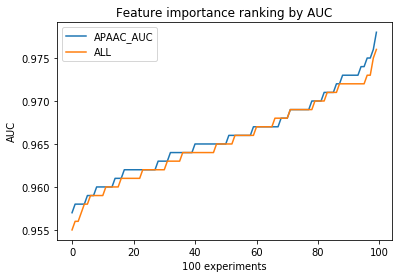

In [12]:
import matplotlib.pyplot as plt
x = range(100)
plt.xlabel("100 experiments")
plt.ylabel("AUC")
plt.title("Feature importance ranking by AUC")
for i in range(len(auc_list111)):
    plt.plot(x,auc_list111[i],label = name111[i])
plt.legend()
plt.savefig('importance ranking.jpg')
plt.show()



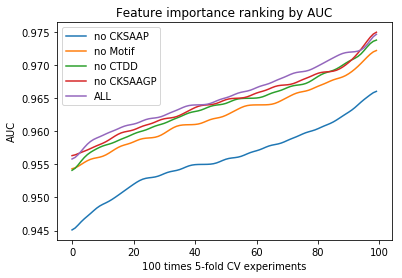

In [200]:
from scipy.ndimage.filters import gaussian_filter1d

x = range(100)
plt.xlabel("100 times 5-fold CV experiments")
plt.ylabel("AUC")
plt.title("Feature importance ranking by AUC")
for i in range(len(auc_list111)):
    ysmoothed = gaussian_filter1d(auc_list111[i], sigma=2)
    plt.plot(x, ysmoothed,label = name111[i])
#     plt.plot(x,auc_list111[i],label = name111[i])
plt.legend()
plt.savefig("feature importance.eps")
plt.show()



In [202]:
df_AfterSMOTE = pd.read_csv("data/allfeaturesSmotewithoutMotif.csv")

In [203]:
df_AfterSMOTE.head()

,A-gp1,C-gp1,D-gp1,E-gp1,F-gp1,G-gp1,H-gp1,I-gp1,K-gp1,L-gp1,...,T14.G.2_T14.G.2_gap1-gp8,T15.G.1_T15.G.1_gap1-gp8,T15.G.1_T15.G.2_gap1-gp8,T15.G.2_T15.G.1_gap1-gp8,T15.G.2_T15.G.2_gap1-gp8,T16.G.1_T16.G.1_gap1-gp8,T16.G.1_T16.G.2_gap1-gp8,T16.G.2_T16.G.1_gap1-gp8,T16.G.2_T16.G.2_gap1-gp8,class
0,0.082353,0.082353,0.035294,0.152941,0.023529,0.047059,0.011765,0.035294,0.129412,0.094118,...,4.0,8.0,11.0,5.0,18.0,4.0,10.0,7.0,21.0,post
1,0.045455,0.272727,0.045455,0.000000,0.000000,0.136364,0.045455,0.000000,0.090909,0.000000,...,0.0,0.0,1.0,1.0,9.0,0.0,0.0,1.0,10.0,post
2,0.071429,0.000000,0.000000,0.000000,0.000000,0.071429,0.000000,0.285714,0.214286,0.214286,...,1.0,1.0,3.0,3.0,0.0,1.0,2.0,3.0,1.0,post
3,0.011236,0.134831,0.067416,0.044944,0.011236,0.056180,0.000000,0.011236,0.033708,0.112360,...,3.0,3.0,10.0,7.0,24.0,3.0,10.0,8.0,23.0,post
4,0.022989,0.126437,0.045977,0.011494,0.034483,0.045977,0.011494,0.057471,0.034483,0.114943,...,6.0,6.0,6.0,9.0,22.0,6.0,5.0,10.0,22.0,post


In [204]:
len(df_AfterSMOTE.columns)

25473

In [ ]:
def performeClassification(df, model, times):
    seed = 19900125
    result = {
        "AUC" : [],
        "ACC" : [],
        "MCC" : [],
        "Sp" : [],
        "Sn" : [],
        "Precision_post": [],
        "Precision_pre" : [],
    }

    for i in range(times):
        seed = seed+i

        if "rf" in model:
            classifier = RandomForestClassifier(n_estimators = 100, random_state=seed)
        elif "bagging" in model:    
            classifier = BaggingClassifier(n_estimators = 100,random_state=seed)
        elif "ada" in model:
            classifier = AdaBoostClassifier(n_estimators = 100,random_state=seed)
        elif "tree" in model:
            classifier = DecisionTreeClassifier()
        elif "nb" in model:
            classifier = GaussianNB()
        elif "knn" in model:
            classifier = KNeighborsClassifier()
        elif "xgboost" in model:
            classifier = xgb.XGBClassifier(n_estimators=100,max_depth=5)
            print(classifier)

        cv = StratifiedKFold(n_splits=5, random_state=seed, shuffle=True)
        results = pd.DataFrame(columns=['training_score', 'test_score'])
        X = df.iloc[:,0:-1]
        Y = df.iloc[:,-1]
        Y = Y.replace(["post", "pre"], [1, 0]) 

        subresult = {
        "AUC" : [],
        "ACC" : [],
        "MCC" : [],
        "Sp" : [],
        "Sn" : [],
        "Precision_post": [],
        "Precision_pre" : [],
    }
    #     1 is post, 0 is pre
        for (train, test), i in zip(cv.split(X, Y), range(5)):
            classifier.fit(X.iloc[train], Y.iloc[train])
            y_pred_test = classifier.predict(X.iloc[test]) # predicted class
            y_pred_test_prob = classifier.predict_proba(X.iloc[test]) # predicted probability 

            fpr, tpr, thresholds = metrics.roc_curve(Y.iloc[test], y_pred_test_prob[:, 1])
            aucresult = metrics.auc(fpr, tpr)
            acc = accuracy_score(Y.iloc[test], y_pred_test)
            mcc = matthews_corrcoef(Y.iloc[test], y_pred_test)
            sp_1 = precision_score( Y.iloc[test], y_pred_test,pos_label=1) 
            sp_0 = precision_score( Y.iloc[test], y_pred_test,pos_label=0) 
            sn_1 = recall_score( Y.iloc[test], y_pred_test,pos_label=1) 
            sn_0 = recall_score( Y.iloc[test], y_pred_test,pos_label=0) 

            subresult["AUC"].append(aucresult)
            subresult["ACC"].append(acc)
            subresult["MCC"].append(mcc)
            subresult["Sp"].append(sn_1)
            subresult["Sn"].append(sn_0)
            subresult["Precision_post"].append(sp_0)
            subresult["Precision_pre"].append(sp_1)

        aucmean = round(np.mean(subresult["AUC"]),3)
        accmean = round(np.mean(subresult["ACC"]),3)
        mccmean = round(np.mean(subresult["MCC"]),3)
        spmean = round(np.mean(subresult["Sp"]),3)
        snmean = round(np.mean(subresult["Sn"]),3)
        precisionPostmean = round(np.mean(subresult["Precision_post"]),3)
        precisionPremean = round(np.mean(subresult["Precision_pre"]),3)

        result["AUC"].append(aucmean)
        result["ACC"].append(accmean)
        result["MCC"].append(mccmean)
        result["Sp"].append(spmean)
        result["Sn"].append(snmean)
        result["Precision_post"].append(precisionPostmean)
        result["Precision_pre"].append(precisionPremean)

    print("metrics\tmean\tstd\terror")
    for key, value in result.items():  
        print(key+"\t"+str(round(np.mean(value),3))+"\t"+str(round(np.std(value),3))+"\t"+str(round(stats.sem(value),3)))
    print()
    for key, value in result.items():  
        print(key+"\t"+str(value))
    # print(result)

In [ ]:
performeClassification(df_AfterSMOTE,"xgboost",100)

In [43]:
# df_1 is AUC
df_1 = pd.DataFrame()
df_1["Motif"] = [0.967, 0.972, 0.964, 0.955, 0.964, 0.959, 0.969, 0.959, 0.966, 0.961, 0.969, 0.969, 0.968, 0.967, 0.959, 0.971, 0.962, 0.964, 0.964, 0.96, 0.955, 0.962, 0.961, 0.963, 0.967, 0.961, 0.966, 0.968, 0.967, 0.964, 0.965, 0.957, 0.966, 0.963, 0.957, 0.96, 0.967, 0.963, 0.956, 0.973, 0.964, 0.962, 0.972, 0.964, 0.971, 0.96, 0.956, 0.964, 0.963, 0.968, 0.956, 0.959, 0.962, 0.957, 0.958, 0.962, 0.954, 0.962, 0.954, 0.956, 0.961, 0.956, 0.97, 0.958, 0.966, 0.965, 0.959, 0.964, 0.964, 0.958, 0.956, 0.962, 0.97, 0.961, 0.961, 0.961, 0.965, 0.968, 0.966, 0.968, 0.958, 0.959, 0.964, 0.959, 0.961, 0.956, 0.961, 0.968, 0.964, 0.958, 0.958, 0.966, 0.961, 0.959, 0.959, 0.966, 0.961, 0.965, 0.955, 0.964]
df_1["APAAC"] = [0.971, 0.973, 0.966, 0.958, 0.965, 0.962, 0.974, 0.959, 0.969, 0.968, 0.973, 0.972, 0.975, 0.97, 0.96, 0.973, 0.966, 0.967, 0.969, 0.963, 0.961, 0.962, 0.964, 0.965, 0.969, 0.962, 0.973, 0.971, 0.97, 0.965, 0.967, 0.964, 0.971, 0.968, 0.962, 0.965, 0.972, 0.962, 0.959, 0.973, 0.964, 0.967, 0.978, 0.964, 0.971, 0.966, 0.962, 0.967, 0.965, 0.967, 0.958, 0.96, 0.965, 0.962, 0.962, 0.967, 0.96, 0.966, 0.961, 0.962, 0.966, 0.958, 0.976, 0.96, 0.975, 0.967, 0.963, 0.967, 0.969, 0.959, 0.96, 0.965, 0.973, 0.964, 0.964, 0.963, 0.969, 0.97, 0.968, 0.969, 0.96, 0.961, 0.966, 0.962, 0.966, 0.965, 0.965, 0.974, 0.962, 0.958, 0.964, 0.963, 0.965, 0.966, 0.965, 0.97, 0.969, 0.967, 0.957, 0.964]
df_1["CKSAAGP"] = [0.969, 0.973, 0.968, 0.957, 0.965, 0.959, 0.969, 0.957, 0.969, 0.968, 0.968, 0.97, 0.972, 0.969, 0.958, 0.974, 0.965, 0.965, 0.967, 0.963, 0.961, 0.968, 0.965, 0.965, 0.972, 0.959, 0.97, 0.97, 0.965, 0.967, 0.964, 0.961, 0.969, 0.966, 0.96, 0.964, 0.969, 0.962, 0.96, 0.974, 0.964, 0.962, 0.975, 0.961, 0.966, 0.961, 0.962, 0.966, 0.965, 0.967, 0.957, 0.957, 0.964, 0.96, 0.961, 0.965, 0.96, 0.962, 0.958, 0.957, 0.962, 0.96, 0.976, 0.963, 0.971, 0.964, 0.967, 0.964, 0.969, 0.958, 0.956, 0.963, 0.967, 0.963, 0.96, 0.969, 0.967, 0.967, 0.966, 0.968, 0.959, 0.964, 0.962, 0.96, 0.964, 0.956, 0.967, 0.971, 0.962, 0.965, 0.958, 0.962, 0.966, 0.961, 0.965, 0.969, 0.966, 0.967, 0.958, 0.964]
df_1["CKSAAP"] = [0.965, 0.96, 0.954, 0.954, 0.951, 0.949, 0.959, 0.954, 0.958, 0.963, 0.956, 0.966, 0.964, 0.959, 0.962, 0.961, 0.955, 0.958, 0.952, 0.954, 0.953, 0.957, 0.955, 0.948, 0.963, 0.953, 0.955, 0.965, 0.955, 0.949, 0.958, 0.95, 0.962, 0.961, 0.956, 0.955, 0.963, 0.951, 0.955, 0.962, 0.953, 0.96, 0.956, 0.945, 0.956, 0.96, 0.955, 0.963, 0.953, 0.965, 0.947, 0.958, 0.961, 0.953, 0.952, 0.96, 0.954, 0.952, 0.947, 0.949, 0.961, 0.95, 0.965, 0.944, 0.96, 0.955, 0.957, 0.959, 0.956, 0.951, 0.95, 0.958, 0.957, 0.949, 0.959, 0.958, 0.953, 0.961, 0.957, 0.956, 0.96, 0.958, 0.955, 0.956, 0.957, 0.947, 0.953, 0.957, 0.955, 0.946, 0.947, 0.955, 0.954, 0.949, 0.959, 0.955, 0.953, 0.967, 0.954, 0.956]
df_1["CTDD"] = [0.967, 0.971, 0.966, 0.958, 0.965, 0.961, 0.969, 0.957, 0.969, 0.965, 0.969, 0.967, 0.969, 0.967, 0.955, 0.972, 0.967, 0.965, 0.967, 0.963, 0.96, 0.963, 0.963, 0.96, 0.968, 0.959, 0.967, 0.97, 0.968, 0.965, 0.97, 0.958, 0.971, 0.966, 0.958, 0.966, 0.973, 0.961, 0.956, 0.974, 0.965, 0.964, 0.974, 0.963, 0.971, 0.964, 0.959, 0.966, 0.963, 0.967, 0.953, 0.962, 0.964, 0.96, 0.957, 0.961, 0.958, 0.963, 0.957, 0.961, 0.964, 0.959, 0.97, 0.959, 0.969, 0.964, 0.965, 0.967, 0.971, 0.956, 0.962, 0.966, 0.971, 0.965, 0.962, 0.961, 0.965, 0.969, 0.965, 0.964, 0.959, 0.96, 0.965, 0.958, 0.965, 0.96, 0.964, 0.974, 0.957, 0.961, 0.96, 0.963, 0.962, 0.958, 0.962, 0.968, 0.965, 0.966, 0.954, 0.964]
df_1["DDE"] = [0.969, 0.971, 0.968, 0.958, 0.964, 0.957, 0.973, 0.959, 0.966, 0.964, 0.972, 0.966, 0.974, 0.968, 0.955, 0.976, 0.967, 0.958, 0.969, 0.966, 0.972, 0.963, 0.968, 0.965, 0.969, 0.964, 0.968, 0.973, 0.968, 0.966, 0.971, 0.966, 0.966, 0.968, 0.961, 0.965, 0.968, 0.97, 0.964, 0.972, 0.962, 0.965, 0.966, 0.967, 0.971, 0.966, 0.965, 0.965, 0.968, 0.96, 0.959, 0.962, 0.969, 0.962, 0.956, 0.966, 0.966, 0.969, 0.958, 0.961, 0.959, 0.961, 0.967, 0.963, 0.97, 0.964, 0.963, 0.964, 0.972, 0.957, 0.961, 0.957, 0.971, 0.963, 0.966, 0.968, 0.964, 0.971, 0.964, 0.965, 0.96, 0.962, 0.966, 0.961, 0.966, 0.962, 0.965, 0.963, 0.962, 0.959, 0.961, 0.963, 0.968, 0.962, 0.963, 0.967, 0.964, 0.956, 0.958, 0.972]
df_1["DPC"] = [0.969, 0.973, 0.965, 0.958, 0.967, 0.961, 0.971, 0.959, 0.97, 0.968, 0.972, 0.969, 0.973, 0.97, 0.958, 0.975, 0.966, 0.964, 0.967, 0.964, 0.963, 0.964, 0.966, 0.964, 0.969, 0.96, 0.97, 0.972, 0.969, 0.968, 0.967, 0.96, 0.973, 0.967, 0.962, 0.964, 0.973, 0.959, 0.959, 0.973, 0.965, 0.966, 0.976, 0.965, 0.971, 0.965, 0.964, 0.965, 0.965, 0.969, 0.958, 0.963, 0.966, 0.962, 0.961, 0.966, 0.961, 0.966, 0.958, 0.96, 0.965, 0.959, 0.972, 0.961, 0.97, 0.966, 0.965, 0.969, 0.97, 0.959, 0.96, 0.962, 0.972, 0.963, 0.962, 0.964, 0.969, 0.968, 0.967, 0.968, 0.961, 0.961, 0.965, 0.961, 0.965, 0.963, 0.968, 0.972, 0.963, 0.962, 0.959, 0.965, 0.964, 0.963, 0.961, 0.97, 0.967, 0.967, 0.955, 0.965]
df_1["GTPC"] = [0.97, 0.973, 0.967, 0.961, 0.967, 0.963, 0.973, 0.957, 0.971, 0.968, 0.971, 0.969, 0.974, 0.971, 0.96, 0.973, 0.969, 0.966, 0.968, 0.964, 0.965, 0.964, 0.966, 0.963, 0.968, 0.962, 0.971, 0.969, 0.97, 0.968, 0.966, 0.958, 0.971, 0.968, 0.962, 0.967, 0.973, 0.964, 0.96, 0.974, 0.965, 0.968, 0.976, 0.965, 0.972, 0.964, 0.967, 0.966, 0.965, 0.966, 0.959, 0.964, 0.968, 0.964, 0.959, 0.967, 0.962, 0.968, 0.959, 0.963, 0.965, 0.957, 0.974, 0.96, 0.973, 0.967, 0.964, 0.966, 0.967, 0.959, 0.963, 0.964, 0.97, 0.965, 0.962, 0.966, 0.967, 0.97, 0.969, 0.969, 0.961, 0.962, 0.966, 0.965, 0.963, 0.959, 0.965, 0.973, 0.959, 0.963, 0.96, 0.964, 0.965, 0.961, 0.965, 0.97, 0.967, 0.966, 0.955, 0.967]
df_1["ALL"] = [0.971, 0.972, 0.965, 0.958, 0.966, 0.962, 0.973, 0.955, 0.969, 0.968, 0.971, 0.969, 0.972, 0.97, 0.96, 0.973, 0.966, 0.963, 0.968, 0.961, 0.962, 0.964, 0.964, 0.962, 0.969, 0.961, 0.971, 0.97, 0.969, 0.966, 0.968, 0.96, 0.972, 0.967, 0.961, 0.966, 0.972, 0.964, 0.959, 0.976, 0.963, 0.966, 0.975, 0.961, 0.972, 0.966, 0.963, 0.965, 0.964, 0.969, 0.96, 0.963, 0.964, 0.962, 0.962, 0.967, 0.959, 0.964, 0.956, 0.962, 0.965, 0.958, 0.972, 0.961, 0.972, 0.968, 0.964, 0.969, 0.97, 0.957, 0.96, 0.965, 0.972, 0.965, 0.962, 0.964, 0.969, 0.971, 0.969, 0.97, 0.961, 0.964, 0.967, 0.959, 0.966, 0.962, 0.967, 0.972, 0.959, 0.96, 0.959, 0.961, 0.964, 0.964, 0.963, 0.968, 0.967, 0.967, 0.956, 0.965]
df_1.head()

,Motif,APAAC,CKSAAGP,CKSAAP,CTDD,DDE,DPC,GTPC,ALL
0,0.967,0.971,0.969,0.965,0.967,0.969,0.969,0.970,0.971
1,0.972,0.973,0.973,0.960,0.971,0.971,0.973,0.973,0.972
2,0.964,0.966,0.968,0.954,0.966,0.968,0.965,0.967,0.965
3,0.955,0.958,0.957,0.954,0.958,0.958,0.958,0.961,0.958
4,0.964,0.965,0.965,0.951,0.965,0.964,0.967,0.967,0.966


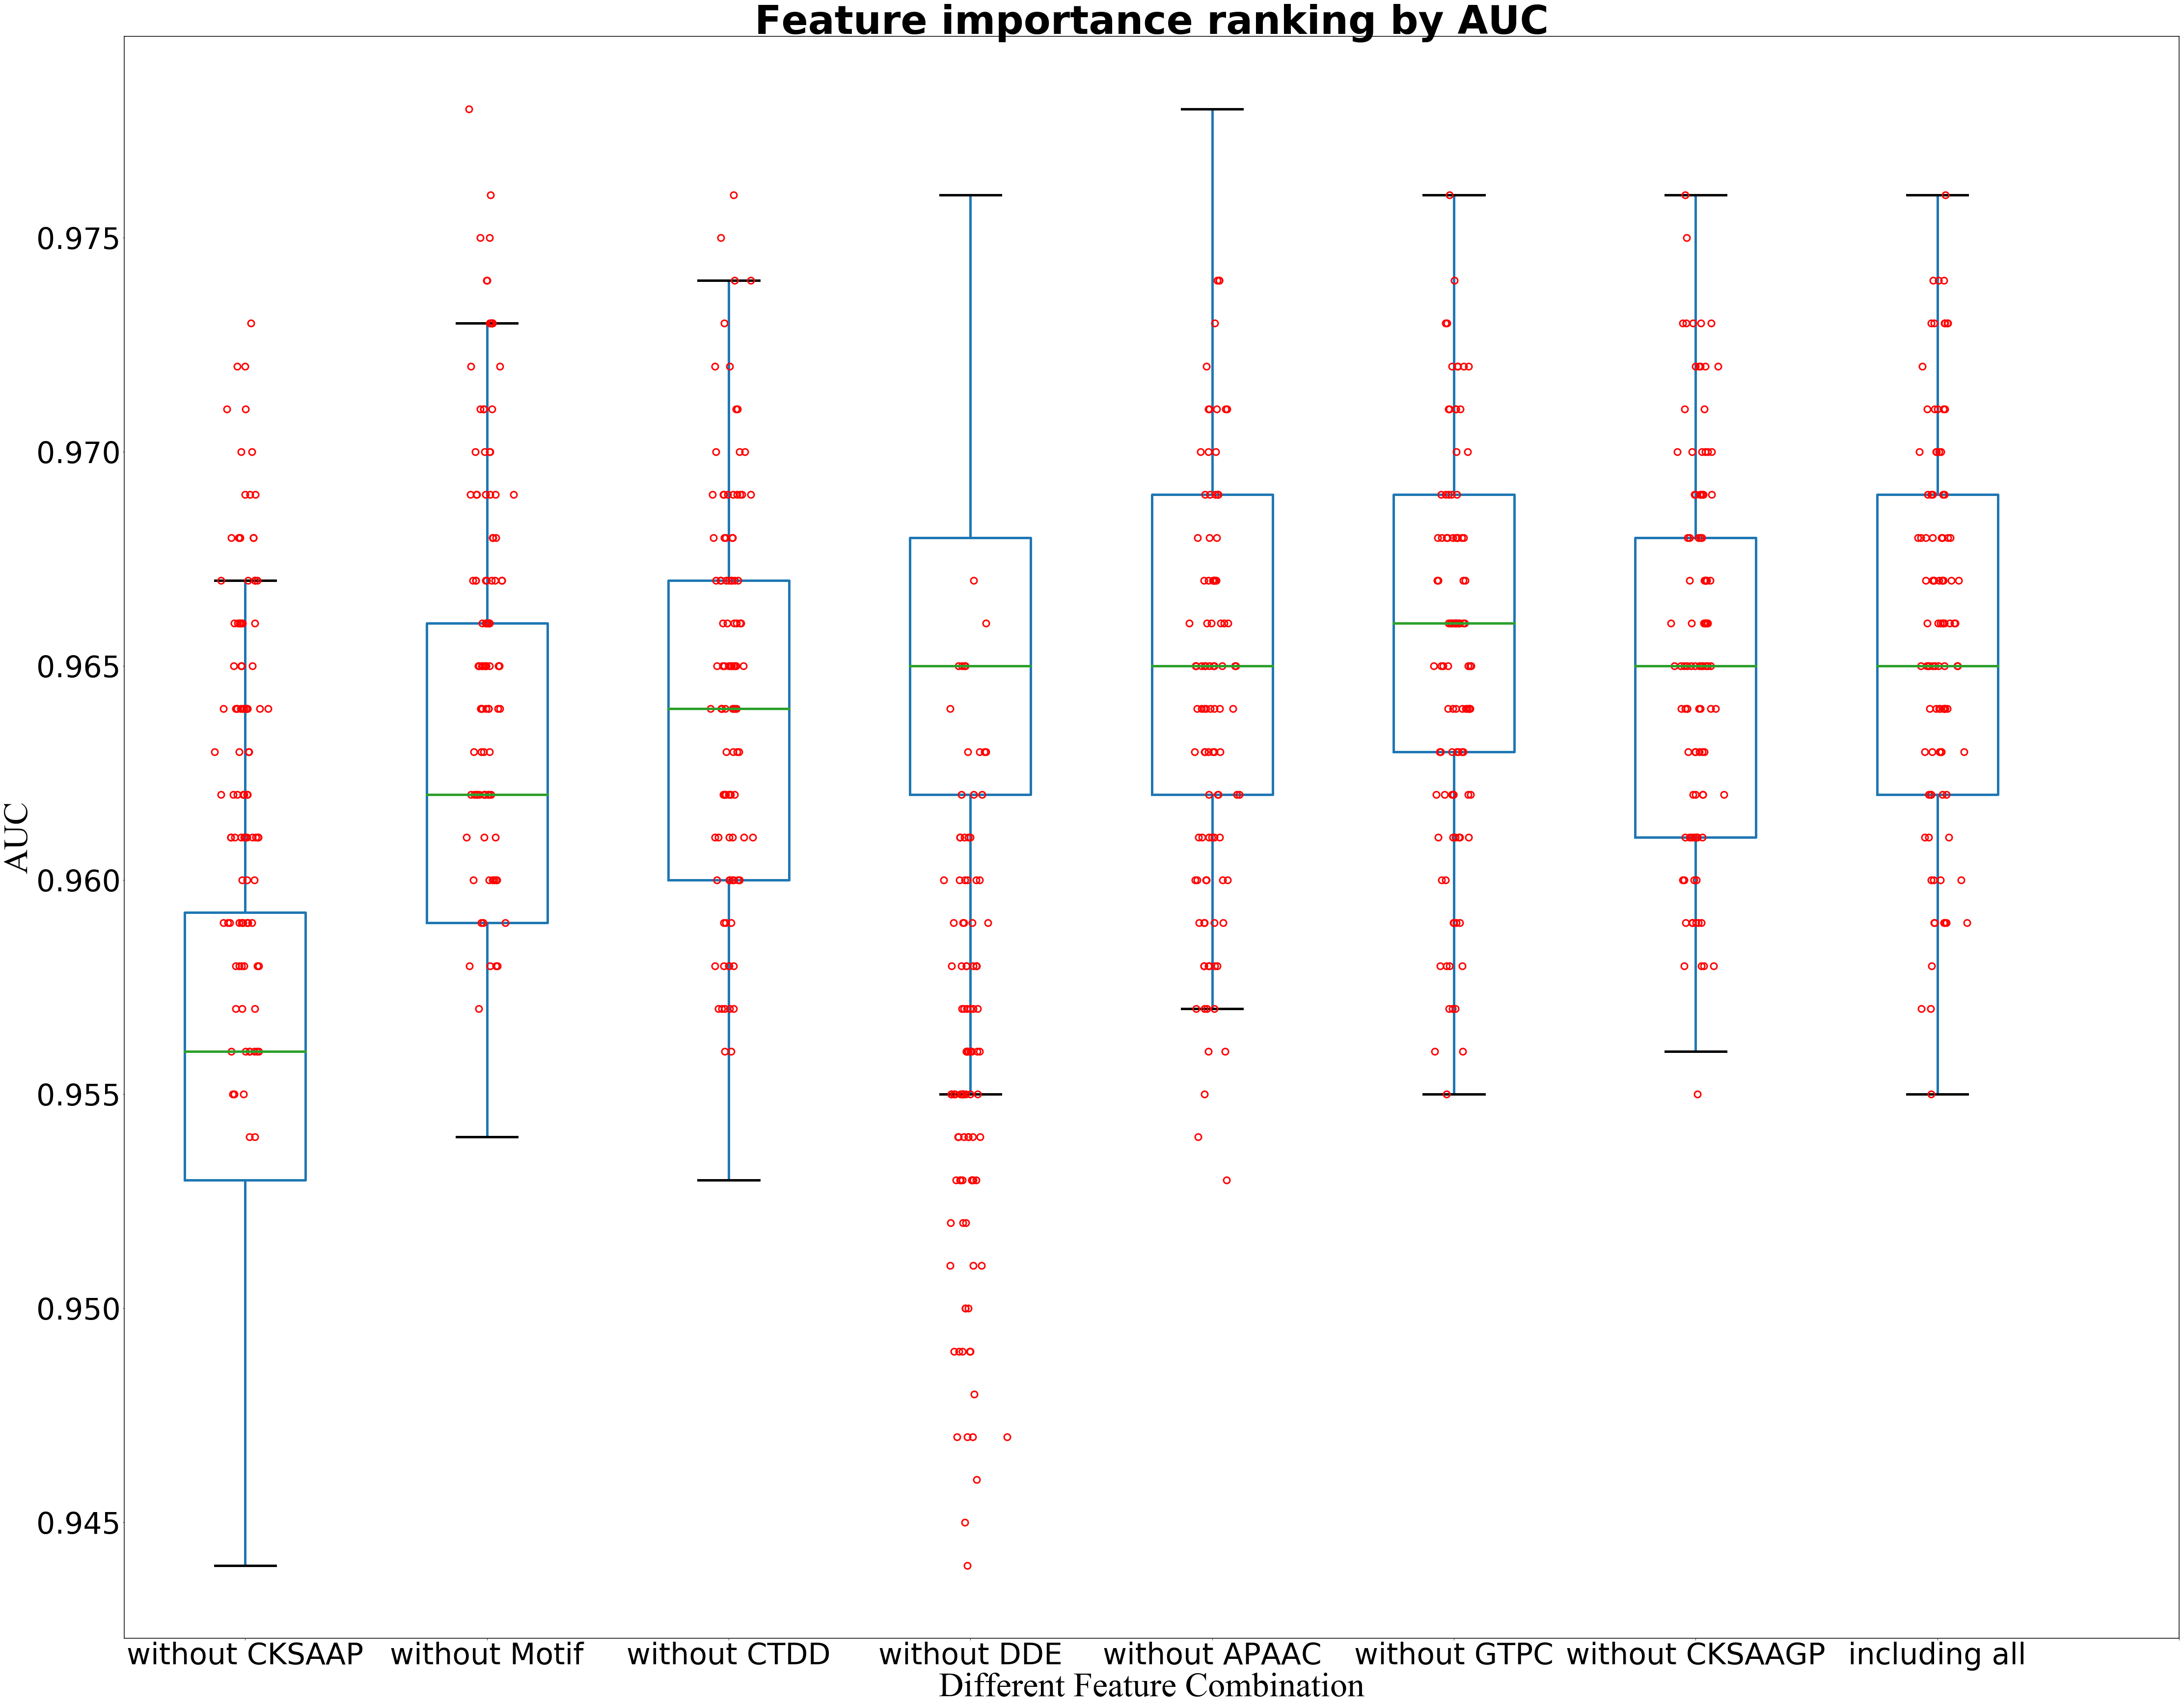

In [265]:
import matplotlib.pyplot as plt

name111 = ["CKSAAP","Motif", "CTDD","DDE","APAAC", "GTPC", "CKSAAGP","ALL"]
name222 = ["without CKSAAP","without Motif", "without CTDD","without DDE","without APAAC", "without GTPC", "without CKSAAGP","including all"]
len(auc_list)

font2 = {'family' : 'Times New Roman',
'weight' : 'normal',
'size'   : 70,
}

plt.figure(figsize = (75,60))
plt.xlabel("Different Feature Combination",font2)
plt.ylabel("AUC",font2)
plt.title("Feature importance ranking by AUC",fontweight="bold",fontsize=80)
plt.rcParams.update({'font.size': 60})
plt.rcParams['axes.linewidth'] = 1.5
props = dict(boxes="DarkGreen", whiskers="DarkOrange", medians="DarkBlue", caps="Gray")
df_1.boxplot(column = name111,grid = False,boxprops=dict(linewidth=5,color = "k"),medianprops = dict(linewidth=5 ,color = "k"),whiskerprops=dict(linewidth=5,color = "black"),capprops=dict(linestyle='-', linewidth=5))
for i in range(8):
    y = df_1.iloc[:,i]
    x = np.random.normal(1+i, 0.04, size=len(y))
    plt.plot(x, y, color = "r", mfc='none',linestyle='None',alpha=1,marker = "o",markersize=13,markeredgewidth=3)
plt.xticks([1,2,3,4,5,6,7,8,9],name222,rotation=0)

plt.xticks(fontsize=60)
plt.yticks(fontsize=60)
plt.savefig("pippin boxplot.eps")
plt.show()


In [102]:
df_rf = pd.DataFrame()
df_rf["AUC"] = [0.967, 0.967, 0.966, 0.954, 0.958, 0.956, 0.969, 0.953, 0.967, 0.96, 0.965, 0.967, 0.971, 0.959, 0.962, 0.968, 0.954, 0.965, 0.956, 0.962, 0.963, 0.96, 0.962, 0.96, 0.963, 0.955, 0.957, 0.962, 0.963, 0.964, 0.963, 0.955, 0.971, 0.965, 0.962, 0.954, 0.961, 0.957, 0.958, 0.97, 0.96, 0.959, 0.964, 0.96, 0.965, 0.964, 0.961, 0.958, 0.96, 0.965, 0.961, 0.963, 0.955, 0.955, 0.957, 0.961, 0.964, 0.961, 0.954, 0.954, 0.964, 0.953, 0.968, 0.95, 0.971, 0.967, 0.964, 0.96, 0.964, 0.961, 0.954, 0.959, 0.964, 0.954, 0.963, 0.96, 0.963, 0.959, 0.958, 0.96, 0.957, 0.96, 0.958, 0.963, 0.963, 0.954, 0.958, 0.965, 0.955, 0.961, 0.961, 0.963, 0.954, 0.958, 0.962, 0.963, 0.957, 0.968, 0.949, 0.966]
df_rf["ACC"] = [0.925, 0.921, 0.928, 0.906, 0.915, 0.915, 0.921, 0.909, 0.912, 0.928, 0.924, 0.909, 0.931, 0.921, 0.922, 0.912, 0.927, 0.906, 0.915, 0.918, 0.918, 0.9, 0.915, 0.925, 0.927, 0.906, 0.931, 0.912, 0.918, 0.902, 0.924, 0.909, 0.931, 0.924, 0.925, 0.915, 0.931, 0.912, 0.915, 0.919, 0.919, 0.909, 0.918, 0.931, 0.925, 0.925, 0.918, 0.909, 0.928, 0.921, 0.915, 0.925, 0.915, 0.906, 0.905, 0.918, 0.912, 0.915, 0.918, 0.903, 0.931, 0.918, 0.924, 0.905, 0.931, 0.918, 0.909, 0.902, 0.921, 0.909, 0.908, 0.921, 0.915, 0.905, 0.909, 0.915, 0.909, 0.928, 0.918, 0.915, 0.912, 0.921, 0.908, 0.925, 0.918, 0.912, 0.902, 0.924, 0.918, 0.906, 0.922, 0.915, 0.918, 0.915, 0.918, 0.924, 0.912, 0.918, 0.896, 0.921]
df_rf["MCC"] =	[0.852, 0.844, 0.856, 0.815, 0.835, 0.833, 0.846, 0.821, 0.826, 0.857, 0.849, 0.825, 0.863, 0.847, 0.845, 0.827, 0.857, 0.816, 0.832, 0.841, 0.843, 0.802, 0.832, 0.851, 0.856, 0.814, 0.863, 0.826, 0.838, 0.806, 0.85, 0.82, 0.865, 0.85, 0.85, 0.832, 0.863, 0.826, 0.831, 0.838, 0.839, 0.819, 0.84, 0.863, 0.85, 0.851, 0.838, 0.821, 0.857, 0.844, 0.832, 0.855, 0.833, 0.814, 0.814, 0.838, 0.826, 0.831, 0.838, 0.808, 0.863, 0.839, 0.849, 0.814, 0.863, 0.841, 0.821, 0.806, 0.844, 0.82, 0.82, 0.846, 0.831, 0.811, 0.821, 0.833, 0.818, 0.856, 0.841, 0.832, 0.825, 0.844, 0.821, 0.852, 0.84, 0.826, 0.806, 0.851, 0.839, 0.813, 0.845, 0.833, 0.837, 0.832, 0.838, 0.849, 0.827, 0.839, 0.796, 0.847]
df_rf["Sp"] =	[0.931, 0.919, 0.912, 0.9, 0.924, 0.925, 0.918, 0.918, 0.912, 0.925, 0.918, 0.894, 0.931, 0.919, 0.925, 0.893, 0.931, 0.911, 0.918, 0.925, 0.899, 0.906, 0.919, 0.931, 0.937, 0.893, 0.925, 0.912, 0.906, 0.918, 0.918, 0.887, 0.931, 0.931, 0.925, 0.924, 0.931, 0.918, 0.918, 0.906, 0.937, 0.912, 0.918, 0.924, 0.912, 0.918, 0.919, 0.906, 0.931, 0.931, 0.906, 0.931, 0.919, 0.906, 0.893, 0.9, 0.924, 0.911, 0.93, 0.893, 0.918, 0.931, 0.918, 0.899, 0.918, 0.918, 0.887, 0.899, 0.925, 0.893, 0.899, 0.924, 0.918, 0.893, 0.905, 0.912, 0.9, 0.931, 0.925, 0.918, 0.906, 0.925, 0.918, 0.918, 0.931, 0.912, 0.893, 0.912, 0.906, 0.9, 0.937, 0.918, 0.918, 0.912, 0.931, 0.931, 0.9, 0.931, 0.9, 0.925]
df_rf["Sn"] =	[0.919, 0.924, 0.943, 0.912, 0.905, 0.906, 0.925, 0.9, 0.912, 0.931, 0.931, 0.924, 0.931, 0.924, 0.918, 0.931, 0.924, 0.9, 0.911, 0.912, 0.938, 0.893, 0.912, 0.918, 0.918, 0.919, 0.937, 0.912, 0.931, 0.887, 0.931, 0.931, 0.931, 0.918, 0.925, 0.906, 0.931, 0.906, 0.912, 0.931, 0.9, 0.906, 0.919, 0.937, 0.938, 0.931, 0.918, 0.912, 0.925, 0.912, 0.925, 0.918, 0.912, 0.906, 0.918, 0.937, 0.899, 0.918, 0.906, 0.912, 0.944, 0.906, 0.931, 0.912, 0.943, 0.918, 0.931, 0.905, 0.918, 0.925, 0.918, 0.918, 0.912, 0.918, 0.912, 0.919, 0.918, 0.925, 0.912, 0.912, 0.919, 0.918, 0.899, 0.931, 0.905, 0.912, 0.912, 0.937, 0.93, 0.912, 0.906, 0.911, 0.918, 0.919, 0.906, 0.918, 0.924, 0.905, 0.893, 0.918]
df_rf["Precision_post"]=[0.931, 0.92, 0.914, 0.901, 0.926, 0.927, 0.921, 0.921, 0.914, 0.928, 0.92, 0.905, 0.933, 0.924, 0.927, 0.898, 0.932, 0.912, 0.919, 0.928, 0.908, 0.907, 0.919, 0.932, 0.937, 0.897, 0.927, 0.915, 0.908, 0.915, 0.921, 0.893, 0.935, 0.931, 0.925, 0.924, 0.931, 0.918, 0.918, 0.909, 0.935, 0.913, 0.919, 0.926, 0.915, 0.921, 0.922, 0.911, 0.932, 0.931, 0.909, 0.935, 0.922, 0.908, 0.898, 0.904, 0.926, 0.914, 0.931, 0.899, 0.921, 0.931, 0.92, 0.904, 0.922, 0.923, 0.893, 0.9, 0.925, 0.897, 0.907, 0.927, 0.92, 0.897, 0.91, 0.913, 0.902, 0.931, 0.927, 0.919, 0.908, 0.926, 0.918, 0.922, 0.932, 0.914, 0.897, 0.917, 0.911, 0.903, 0.936, 0.919, 0.919, 0.913, 0.932, 0.931, 0.905, 0.93, 0.903, 0.929]
df_rf["Precision_pre"]=[0.924, 0.926, 0.942, 0.917, 0.914, 0.91, 0.928, 0.904, 0.913, 0.93, 0.93, 0.927, 0.931, 0.926, 0.919, 0.931, 0.927, 0.909, 0.915, 0.918, 0.941, 0.899, 0.913, 0.921, 0.92, 0.92, 0.938, 0.913, 0.93, 0.892, 0.93, 0.929, 0.933, 0.921, 0.926, 0.91, 0.933, 0.909, 0.914, 0.929, 0.906, 0.907, 0.923, 0.938, 0.936, 0.931, 0.918, 0.914, 0.927, 0.915, 0.923, 0.925, 0.914, 0.908, 0.919, 0.935, 0.903, 0.918, 0.909, 0.911, 0.943, 0.911, 0.93, 0.912, 0.942, 0.922, 0.93, 0.907, 0.921, 0.924, 0.916, 0.922, 0.912, 0.915, 0.914, 0.923, 0.917, 0.925, 0.918, 0.915, 0.918, 0.92, 0.906, 0.934, 0.911, 0.914, 0.91, 0.937, 0.931, 0.911, 0.912, 0.919, 0.919, 0.921, 0.907, 0.919, 0.924, 0.911, 0.896, 0.923]

In [103]:
df_xgboost = pd.DataFrame()
df_xgboost["AUC"]=	[0.971, 0.972, 0.965, 0.958, 0.966, 0.962, 0.973, 0.955, 0.969, 0.968, 0.971, 0.969, 0.972, 0.97, 0.96, 0.973, 0.966, 0.963, 0.968, 0.961, 0.962, 0.964, 0.964, 0.962, 0.969, 0.961, 0.971, 0.97, 0.969, 0.966, 0.968, 0.96, 0.972, 0.967, 0.961, 0.966, 0.972, 0.964, 0.959, 0.976, 0.963, 0.966, 0.975, 0.961, 0.972, 0.966, 0.963, 0.965, 0.964, 0.969, 0.96, 0.963, 0.964, 0.962, 0.962, 0.967, 0.959, 0.964, 0.956, 0.962, 0.965, 0.958, 0.972, 0.961, 0.972, 0.968, 0.964, 0.969, 0.97, 0.957, 0.96, 0.965, 0.972, 0.965, 0.962, 0.964, 0.969, 0.971, 0.969, 0.97, 0.961, 0.964, 0.967, 0.959, 0.966, 0.962, 0.967, 0.972, 0.959, 0.96, 0.959, 0.961, 0.964, 0.964, 0.963, 0.968, 0.967, 0.967, 0.956, 0.965]
df_xgboost["ACC"]=	[0.906, 0.899, 0.924, 0.902, 0.899, 0.909, 0.922, 0.899, 0.906, 0.931, 0.903, 0.903, 0.922, 0.918, 0.9, 0.912, 0.918, 0.906, 0.912, 0.893, 0.903, 0.903, 0.906, 0.896, 0.909, 0.915, 0.928, 0.924, 0.922, 0.906, 0.896, 0.896, 0.912, 0.912, 0.902, 0.906, 0.924, 0.906, 0.912, 0.931, 0.899, 0.906, 0.918, 0.896, 0.928, 0.909, 0.893, 0.928, 0.918, 0.909, 0.896, 0.921, 0.906, 0.915, 0.896, 0.905, 0.909, 0.905, 0.896, 0.893, 0.909, 0.893, 0.928, 0.909, 0.915, 0.909, 0.9, 0.927, 0.905, 0.897, 0.893, 0.921, 0.912, 0.915, 0.918, 0.903, 0.906, 0.921, 0.915, 0.899, 0.896, 0.909, 0.921, 0.893, 0.909, 0.903, 0.909, 0.903, 0.924, 0.884, 0.874, 0.886, 0.896, 0.909, 0.909, 0.912, 0.921, 0.902, 0.893, 0.918]
df_xgboost["MCC"]=	[0.814, 0.803, 0.849, 0.806, 0.803, 0.82, 0.844, 0.802, 0.812, 0.863, 0.806, 0.809, 0.844, 0.838, 0.802, 0.826, 0.839, 0.812, 0.825, 0.789, 0.809, 0.812, 0.813, 0.794, 0.818, 0.832, 0.856, 0.849, 0.844, 0.813, 0.796, 0.794, 0.826, 0.826, 0.807, 0.813, 0.85, 0.812, 0.825, 0.863, 0.801, 0.813, 0.839, 0.794, 0.857, 0.819, 0.788, 0.858, 0.84, 0.821, 0.795, 0.847, 0.814, 0.833, 0.795, 0.814, 0.819, 0.814, 0.793, 0.786, 0.82, 0.787, 0.856, 0.819, 0.833, 0.82, 0.803, 0.857, 0.813, 0.797, 0.79, 0.847, 0.825, 0.831, 0.839, 0.807, 0.813, 0.844, 0.836, 0.802, 0.794, 0.819, 0.845, 0.788, 0.821, 0.811, 0.818, 0.808, 0.851, 0.77, 0.752, 0.778, 0.795, 0.82, 0.82, 0.827, 0.844, 0.807, 0.791, 0.84]
df_xgboost["Sp"]=	[0.925, 0.906, 0.924, 0.893, 0.874, 0.918, 0.912, 0.899, 0.899, 0.931, 0.899, 0.906, 0.912, 0.918, 0.906, 0.886, 0.912, 0.893, 0.906, 0.918, 0.899, 0.905, 0.906, 0.881, 0.912, 0.905, 0.924, 0.924, 0.912, 0.899, 0.887, 0.88, 0.918, 0.912, 0.893, 0.905, 0.918, 0.906, 0.905, 0.918, 0.893, 0.912, 0.93, 0.88, 0.925, 0.918, 0.906, 0.937, 0.912, 0.906, 0.906, 0.925, 0.894, 0.912, 0.881, 0.893, 0.918, 0.893, 0.893, 0.893, 0.899, 0.893, 0.912, 0.905, 0.899, 0.899, 0.905, 0.925, 0.899, 0.893, 0.912, 0.905, 0.906, 0.919, 0.918, 0.893, 0.9, 0.918, 0.918, 0.905, 0.874, 0.893, 0.925, 0.881, 0.912, 0.912, 0.906, 0.899, 0.924, 0.869, 0.874, 0.9, 0.887, 0.912, 0.906, 0.912, 0.918, 0.906, 0.906, 0.912]
df_xgboost["Sn"]=	[0.887, 0.892, 0.924, 0.912, 0.924, 0.9, 0.931, 0.9, 0.912, 0.931, 0.906, 0.899, 0.931, 0.918, 0.893, 0.937, 0.925, 0.918, 0.918, 0.868, 0.906, 0.9, 0.906, 0.912, 0.905, 0.925, 0.931, 0.924, 0.931, 0.912, 0.905, 0.912, 0.906, 0.911, 0.912, 0.906, 0.93, 0.906, 0.918, 0.944, 0.906, 0.9, 0.906, 0.911, 0.931, 0.9, 0.88, 0.919, 0.924, 0.911, 0.887, 0.918, 0.918, 0.919, 0.911, 0.918, 0.899, 0.918, 0.899, 0.893, 0.919, 0.893, 0.943, 0.912, 0.931, 0.918, 0.894, 0.93, 0.912, 0.9, 0.875, 0.937, 0.918, 0.912, 0.919, 0.912, 0.912, 0.925, 0.912, 0.893, 0.919, 0.924, 0.918, 0.906, 0.905, 0.893, 0.912, 0.906, 0.925, 0.899, 0.874, 0.873, 0.906, 0.905, 0.912, 0.911, 0.924, 0.899, 0.881, 0.924]
df_xgboost["Precision_post"]=	[0.921, 0.908, 0.925, 0.896, 0.884, 0.917, 0.913, 0.903, 0.902, 0.933, 0.901, 0.907, 0.914, 0.92, 0.908, 0.892, 0.916, 0.897, 0.908, 0.914, 0.904, 0.913, 0.908, 0.887, 0.912, 0.91, 0.926, 0.925, 0.914, 0.9, 0.892, 0.885, 0.918, 0.914, 0.897, 0.907, 0.92, 0.907, 0.907, 0.92, 0.896, 0.913, 0.93, 0.885, 0.927, 0.916, 0.904, 0.937, 0.917, 0.91, 0.907, 0.928, 0.899, 0.917, 0.886, 0.898, 0.918, 0.897, 0.894, 0.895, 0.902, 0.893, 0.915, 0.908, 0.904, 0.902, 0.905, 0.926, 0.901, 0.897, 0.911, 0.912, 0.909, 0.918, 0.918, 0.896, 0.902, 0.92, 0.926, 0.908, 0.881, 0.897, 0.926, 0.885, 0.915, 0.918, 0.907, 0.904, 0.928, 0.875, 0.878, 0.9, 0.892, 0.914, 0.909, 0.916, 0.919, 0.905, 0.908, 0.917]
df_xgboost["Precision_pre"]=	[0.894, 0.901, 0.925, 0.912, 0.924, 0.905, 0.931, 0.903, 0.911, 0.93, 0.905, 0.906, 0.931, 0.92, 0.896, 0.935, 0.926, 0.916, 0.918, 0.877, 0.909, 0.906, 0.907, 0.909, 0.907, 0.924, 0.931, 0.924, 0.931, 0.914, 0.909, 0.91, 0.91, 0.914, 0.913, 0.907, 0.932, 0.907, 0.921, 0.944, 0.906, 0.902, 0.911, 0.912, 0.931, 0.904, 0.885, 0.923, 0.926, 0.914, 0.891, 0.923, 0.918, 0.918, 0.912, 0.92, 0.902, 0.919, 0.898, 0.892, 0.92, 0.895, 0.942, 0.913, 0.932, 0.92, 0.902, 0.933, 0.914, 0.904, 0.882, 0.939, 0.917, 0.913, 0.923, 0.912, 0.911, 0.925, 0.916, 0.898, 0.915, 0.923, 0.921, 0.904, 0.909, 0.899, 0.911, 0.907, 0.926, 0.897, 0.878, 0.884, 0.905, 0.91, 0.913, 0.914, 0.926, 0.905, 0.887, 0.926]

In [104]:
df_bagging = pd.DataFrame()
df_bagging["AUC"]=	[0.964, 0.967, 0.965, 0.959, 0.959, 0.953, 0.967, 0.948, 0.965, 0.962, 0.966, 0.967, 0.967, 0.965, 0.964, 0.965, 0.965, 0.958, 0.96, 0.95, 0.967, 0.959, 0.962, 0.956, 0.965, 0.961, 0.962, 0.968, 0.953, 0.97, 0.961, 0.956, 0.966, 0.96, 0.962, 0.955, 0.96, 0.963, 0.955, 0.971, 0.962, 0.958, 0.971, 0.96, 0.968, 0.965, 0.961, 0.958, 0.96, 0.962, 0.959, 0.963, 0.961, 0.956, 0.958, 0.963, 0.961, 0.96, 0.952, 0.952, 0.959, 0.959, 0.965, 0.959, 0.97, 0.962, 0.963, 0.961, 0.965, 0.957, 0.952, 0.952, 0.966, 0.952, 0.959, 0.957, 0.964, 0.955, 0.962, 0.955, 0.95, 0.95, 0.961, 0.951, 0.962, 0.945, 0.957, 0.967, 0.957, 0.961, 0.961, 0.947, 0.962, 0.961, 0.959, 0.962, 0.964, 0.957, 0.95, 0.959]
df_bagging["ACC"]=	[0.909, 0.902, 0.915, 0.915, 0.908, 0.884, 0.915, 0.883, 0.893, 0.915, 0.912, 0.915, 0.909, 0.899, 0.896, 0.925, 0.921, 0.896, 0.912, 0.896, 0.909, 0.9, 0.884, 0.903, 0.915, 0.902, 0.902, 0.918, 0.909, 0.89, 0.908, 0.896, 0.915, 0.899, 0.903, 0.896, 0.925, 0.906, 0.89, 0.915, 0.918, 0.896, 0.928, 0.899, 0.912, 0.918, 0.877, 0.903, 0.912, 0.912, 0.903, 0.915, 0.912, 0.912, 0.912, 0.902, 0.918, 0.896, 0.906, 0.88, 0.896, 0.89, 0.918, 0.903, 0.915, 0.899, 0.9, 0.908, 0.915, 0.906, 0.884, 0.899, 0.902, 0.884, 0.899, 0.9, 0.906, 0.903, 0.893, 0.899, 0.89, 0.88, 0.906, 0.89, 0.896, 0.886, 0.905, 0.918, 0.906, 0.903, 0.887, 0.899, 0.903, 0.9, 0.89, 0.893, 0.912, 0.905, 0.871, 0.918]
df_bagging["MCC"]=	[0.821, 0.808, 0.831, 0.831, 0.82, 0.772, 0.833, 0.771, 0.79, 0.832, 0.826, 0.834, 0.818, 0.8, 0.795, 0.851, 0.844, 0.795, 0.825, 0.797, 0.824, 0.808, 0.769, 0.808, 0.832, 0.806, 0.808, 0.838, 0.818, 0.782, 0.818, 0.794, 0.833, 0.8, 0.807, 0.795, 0.853, 0.815, 0.783, 0.831, 0.838, 0.794, 0.857, 0.802, 0.825, 0.838, 0.756, 0.81, 0.826, 0.827, 0.808, 0.835, 0.826, 0.828, 0.825, 0.808, 0.838, 0.796, 0.812, 0.762, 0.794, 0.781, 0.838, 0.808, 0.834, 0.8, 0.801, 0.818, 0.831, 0.814, 0.774, 0.799, 0.806, 0.77, 0.802, 0.8, 0.814, 0.807, 0.792, 0.803, 0.781, 0.763, 0.816, 0.783, 0.795, 0.78, 0.811, 0.839, 0.814, 0.807, 0.778, 0.805, 0.806, 0.801, 0.783, 0.792, 0.827, 0.815, 0.746, 0.841]
df_bagging["Sp"]=	[0.918, 0.906, 0.918, 0.912, 0.911, 0.893, 0.925, 0.893, 0.899, 0.912, 0.918, 0.925, 0.912, 0.887, 0.906, 0.931, 0.937, 0.893, 0.906, 0.918, 0.905, 0.9, 0.887, 0.919, 0.924, 0.899, 0.893, 0.918, 0.925, 0.893, 0.905, 0.893, 0.931, 0.893, 0.899, 0.906, 0.912, 0.912, 0.88, 0.906, 0.924, 0.9, 0.924, 0.887, 0.9, 0.918, 0.899, 0.899, 0.912, 0.919, 0.919, 0.906, 0.912, 0.906, 0.906, 0.88, 0.911, 0.88, 0.905, 0.893, 0.905, 0.905, 0.906, 0.899, 0.924, 0.918, 0.887, 0.899, 0.918, 0.906, 0.886, 0.899, 0.899, 0.868, 0.874, 0.9, 0.925, 0.899, 0.887, 0.918, 0.88, 0.849, 0.906, 0.887, 0.906, 0.9, 0.893, 0.924, 0.9, 0.894, 0.868, 0.912, 0.906, 0.9, 0.887, 0.9, 0.906, 0.918, 0.893, 0.937]
df_bagging["Sn"]=	[0.9, 0.899, 0.912, 0.919, 0.905, 0.875, 0.905, 0.874, 0.887, 0.919, 0.906, 0.905, 0.905, 0.912, 0.887, 0.919, 0.905, 0.9, 0.918, 0.874, 0.912, 0.9, 0.881, 0.886, 0.906, 0.906, 0.911, 0.918, 0.893, 0.887, 0.911, 0.9, 0.9, 0.905, 0.906, 0.887, 0.937, 0.9, 0.9, 0.925, 0.912, 0.893, 0.931, 0.911, 0.925, 0.918, 0.855, 0.906, 0.912, 0.905, 0.887, 0.925, 0.912, 0.918, 0.918, 0.925, 0.925, 0.912, 0.906, 0.868, 0.887, 0.874, 0.93, 0.906, 0.906, 0.88, 0.912, 0.918, 0.912, 0.906, 0.881, 0.899, 0.905, 0.9, 0.925, 0.9, 0.887, 0.906, 0.9, 0.881, 0.9, 0.911, 0.905, 0.894, 0.887, 0.873, 0.918, 0.912, 0.911, 0.912, 0.906, 0.885, 0.899, 0.9, 0.893, 0.886, 0.918, 0.892, 0.849, 0.899]
df_bagging["Precision_post"]=	[0.916, 0.907, 0.919, 0.912, 0.912, 0.893, 0.927, 0.895, 0.904, 0.914, 0.917, 0.927, 0.912, 0.891, 0.906, 0.93, 0.935, 0.896, 0.908, 0.917, 0.911, 0.909, 0.887, 0.917, 0.924, 0.901, 0.898, 0.921, 0.922, 0.892, 0.907, 0.895, 0.929, 0.896, 0.901, 0.906, 0.917, 0.913, 0.885, 0.908, 0.925, 0.9, 0.926, 0.891, 0.903, 0.919, 0.896, 0.903, 0.914, 0.92, 0.918, 0.911, 0.914, 0.911, 0.908, 0.888, 0.916, 0.887, 0.906, 0.891, 0.905, 0.903, 0.908, 0.903, 0.926, 0.914, 0.89, 0.901, 0.917, 0.907, 0.894, 0.897, 0.901, 0.878, 0.883, 0.9, 0.923, 0.902, 0.896, 0.917, 0.885, 0.858, 0.911, 0.889, 0.904, 0.901, 0.896, 0.926, 0.903, 0.899, 0.877, 0.913, 0.907, 0.901, 0.891, 0.906, 0.91, 0.919, 0.891, 0.937]
df_bagging["Precision_pre"]=	[0.908, 0.905, 0.913, 0.92, 0.91, 0.884, 0.91, 0.88, 0.89, 0.92, 0.91, 0.911, 0.908, 0.912, 0.891, 0.922, 0.911, 0.903, 0.918, 0.884, 0.92, 0.907, 0.883, 0.894, 0.909, 0.907, 0.914, 0.92, 0.897, 0.892, 0.913, 0.9, 0.907, 0.906, 0.908, 0.892, 0.939, 0.904, 0.9, 0.924, 0.914, 0.894, 0.932, 0.915, 0.923, 0.92, 0.862, 0.912, 0.915, 0.912, 0.893, 0.928, 0.913, 0.92, 0.92, 0.923, 0.925, 0.913, 0.906, 0.872, 0.892, 0.879, 0.931, 0.907, 0.913, 0.888, 0.913, 0.919, 0.915, 0.908, 0.886, 0.903, 0.907, 0.895, 0.922, 0.901, 0.894, 0.907, 0.902, 0.89, 0.897, 0.907, 0.911, 0.896, 0.893, 0.886, 0.916, 0.915, 0.914, 0.91, 0.906, 0.899, 0.9, 0.901, 0.896, 0.893, 0.92, 0.901, 0.859, 0.908]

In [117]:
df_adaboost = pd.DataFrame()
df_adaboost["AUC"]=	[0.948, 0.95, 0.951, 0.945, 0.948, 0.944, 0.944, 0.946, 0.939, 0.945, 0.951, 0.938, 0.954, 0.938, 0.933, 0.954, 0.942, 0.941, 0.947, 0.944, 0.943, 0.958, 0.949, 0.938, 0.952, 0.935, 0.959, 0.959, 0.947, 0.961, 0.945, 0.925, 0.957, 0.943, 0.939, 0.938, 0.935, 0.929, 0.95, 0.955, 0.936, 0.939, 0.949, 0.953, 0.95, 0.938, 0.944, 0.939, 0.942, 0.947, 0.944, 0.95, 0.943, 0.959, 0.951, 0.942, 0.946, 0.963, 0.934, 0.957, 0.952, 0.948, 0.945, 0.929, 0.939, 0.957, 0.953, 0.946, 0.949, 0.944, 0.936, 0.931, 0.942, 0.938, 0.948, 0.955, 0.944, 0.948, 0.951, 0.937, 0.943, 0.951, 0.951, 0.95, 0.955, 0.952, 0.944, 0.943, 0.941, 0.935, 0.94, 0.935, 0.944, 0.945, 0.944, 0.929, 0.953, 0.948, 0.954, 0.923]
df_adaboost["ACC"]=	[0.896, 0.887, 0.887, 0.865, 0.89, 0.9, 0.875, 0.874, 0.868, 0.868, 0.881, 0.88, 0.909, 0.884, 0.858, 0.899, 0.865, 0.893, 0.877, 0.908, 0.884, 0.884, 0.868, 0.868, 0.893, 0.874, 0.902, 0.884, 0.89, 0.896, 0.887, 0.865, 0.893, 0.868, 0.884, 0.858, 0.893, 0.855, 0.874, 0.903, 0.871, 0.875, 0.899, 0.884, 0.896, 0.887, 0.865, 0.871, 0.89, 0.868, 0.862, 0.896, 0.893, 0.903, 0.903, 0.887, 0.909, 0.902, 0.887, 0.899, 0.874, 0.9, 0.89, 0.868, 0.887, 0.874, 0.893, 0.889, 0.874, 0.887, 0.871, 0.855, 0.884, 0.878, 0.89, 0.893, 0.868, 0.896, 0.865, 0.877, 0.874, 0.881, 0.893, 0.884, 0.893, 0.874, 0.893, 0.893, 0.873, 0.852, 0.887, 0.864, 0.884, 0.893, 0.859, 0.862, 0.893, 0.883, 0.893, 0.868]
df_adaboost["MCC"]=	[0.795, 0.777, 0.775, 0.731, 0.784, 0.802, 0.754, 0.753, 0.739, 0.737, 0.766, 0.763, 0.818, 0.769, 0.72, 0.802, 0.733, 0.789, 0.758, 0.819, 0.772, 0.775, 0.74, 0.738, 0.792, 0.752, 0.805, 0.769, 0.781, 0.793, 0.775, 0.733, 0.79, 0.736, 0.77, 0.719, 0.791, 0.714, 0.754, 0.808, 0.745, 0.75, 0.804, 0.773, 0.796, 0.776, 0.731, 0.746, 0.781, 0.74, 0.726, 0.796, 0.79, 0.807, 0.808, 0.776, 0.82, 0.806, 0.775, 0.802, 0.752, 0.801, 0.784, 0.737, 0.777, 0.757, 0.791, 0.78, 0.75, 0.774, 0.747, 0.712, 0.769, 0.756, 0.782, 0.791, 0.737, 0.795, 0.735, 0.758, 0.752, 0.762, 0.788, 0.772, 0.789, 0.752, 0.789, 0.791, 0.755, 0.712, 0.778, 0.732, 0.768, 0.789, 0.72, 0.729, 0.788, 0.77, 0.793, 0.743]
df_adaboost["Sp"]=	[0.9, 0.868, 0.868, 0.868, 0.874, 0.9, 0.881, 0.886, 0.874, 0.874, 0.893, 0.881, 0.9, 0.868, 0.849, 0.893, 0.874, 0.874, 0.893, 0.886, 0.911, 0.919, 0.875, 0.874, 0.906, 0.861, 0.911, 0.861, 0.893, 0.899, 0.868, 0.849, 0.899, 0.855, 0.887, 0.861, 0.906, 0.817, 0.855, 0.918, 0.887, 0.862, 0.88, 0.862, 0.875, 0.875, 0.868, 0.861, 0.899, 0.862, 0.856, 0.912, 0.881, 0.887, 0.894, 0.861, 0.911, 0.899, 0.874, 0.893, 0.849, 0.881, 0.899, 0.868, 0.886, 0.868, 0.899, 0.893, 0.887, 0.887, 0.862, 0.836, 0.899, 0.874, 0.868, 0.899, 0.874, 0.875, 0.868, 0.849, 0.88, 0.881, 0.906, 0.855, 0.881, 0.874, 0.879, 0.899, 0.829, 0.837, 0.886, 0.862, 0.893, 0.906, 0.856, 0.862, 0.899, 0.899, 0.893, 0.855]
df_adaboost["Sn"]=	[0.893, 0.905, 0.906, 0.862, 0.905, 0.9, 0.869, 0.862, 0.862, 0.862, 0.869, 0.88, 0.918, 0.899, 0.868, 0.905, 0.855, 0.912, 0.861, 0.93, 0.856, 0.849, 0.861, 0.861, 0.88, 0.887, 0.893, 0.906, 0.887, 0.893, 0.905, 0.881, 0.888, 0.88, 0.881, 0.855, 0.88, 0.893, 0.894, 0.887, 0.856, 0.887, 0.919, 0.905, 0.918, 0.9, 0.861, 0.881, 0.88, 0.874, 0.868, 0.88, 0.906, 0.918, 0.911, 0.912, 0.906, 0.906, 0.9, 0.906, 0.9, 0.919, 0.88, 0.868, 0.887, 0.88, 0.888, 0.886, 0.861, 0.887, 0.881, 0.874, 0.868, 0.881, 0.912, 0.887, 0.862, 0.918, 0.862, 0.906, 0.869, 0.88, 0.88, 0.912, 0.906, 0.874, 0.906, 0.887, 0.918, 0.867, 0.887, 0.867, 0.874, 0.881, 0.862, 0.861, 0.887, 0.867, 0.893, 0.88]
df_adaboost["Precision_post"]=	[0.902, 0.876, 0.873, 0.868, 0.88, 0.903, 0.884, 0.887, 0.878, 0.873, 0.892, 0.883, 0.902, 0.873, 0.856, 0.897, 0.878, 0.879, 0.893, 0.894, 0.909, 0.919, 0.88, 0.876, 0.908, 0.868, 0.911, 0.869, 0.892, 0.9, 0.874, 0.856, 0.899, 0.859, 0.889, 0.862, 0.907, 0.832, 0.862, 0.917, 0.884, 0.867, 0.888, 0.872, 0.885, 0.879, 0.868, 0.866, 0.898, 0.868, 0.861, 0.912, 0.89, 0.892, 0.898, 0.87, 0.915, 0.903, 0.879, 0.899, 0.858, 0.885, 0.901, 0.87, 0.889, 0.877, 0.899, 0.89, 0.885, 0.887, 0.866, 0.845, 0.898, 0.877, 0.874, 0.901, 0.873, 0.884, 0.872, 0.859, 0.882, 0.882, 0.905, 0.866, 0.885, 0.879, 0.89, 0.904, 0.854, 0.849, 0.89, 0.864, 0.892, 0.904, 0.859, 0.868, 0.899, 0.897, 0.899, 0.867]
df_adaboost["Precision_pre"]=	[0.895, 0.906, 0.903, 0.864, 0.908, 0.902, 0.875, 0.87, 0.864, 0.865, 0.878, 0.882, 0.917, 0.899, 0.868, 0.909, 0.858, 0.913, 0.868, 0.928, 0.866, 0.864, 0.865, 0.864, 0.89, 0.888, 0.895, 0.902, 0.889, 0.894, 0.903, 0.879, 0.894, 0.878, 0.882, 0.86, 0.889, 0.886, 0.897, 0.893, 0.863, 0.883, 0.92, 0.905, 0.915, 0.898, 0.864, 0.883, 0.885, 0.877, 0.866, 0.887, 0.905, 0.918, 0.912, 0.909, 0.908, 0.905, 0.898, 0.907, 0.897, 0.919, 0.887, 0.868, 0.892, 0.888, 0.897, 0.891, 0.867, 0.887, 0.885, 0.87, 0.873, 0.88, 0.909, 0.896, 0.864, 0.914, 0.869, 0.902, 0.873, 0.881, 0.886, 0.91, 0.906, 0.877, 0.903, 0.892, 0.908, 0.872, 0.893, 0.871, 0.878, 0.887, 0.865, 0.867, 0.89, 0.876, 0.901, 0.885]

In [106]:
df_nb = pd.DataFrame()
df_nb["AUC"]=	[0.894, 0.896, 0.891, 0.898, 0.902, 0.885, 0.898, 0.902, 0.894, 0.903, 0.902, 0.897, 0.9, 0.884, 0.894, 0.897, 0.887, 0.901, 0.9, 0.906, 0.91, 0.895, 0.901, 0.9, 0.901, 0.893, 0.897, 0.898, 0.897, 0.903, 0.896, 0.897, 0.904, 0.902, 0.905, 0.891, 0.906, 0.89, 0.899, 0.91, 0.895, 0.885, 0.897, 0.904, 0.898, 0.903, 0.901, 0.898, 0.898, 0.9, 0.892, 0.89, 0.887, 0.896, 0.911, 0.892, 0.91, 0.9, 0.886, 0.892, 0.901, 0.904, 0.888, 0.899, 0.894, 0.897, 0.899, 0.895, 0.897, 0.904, 0.893, 0.88, 0.898, 0.892, 0.896, 0.895, 0.899, 0.904, 0.899, 0.9, 0.9, 0.903, 0.892, 0.9, 0.894, 0.903, 0.9, 0.895, 0.91, 0.896, 0.892, 0.886, 0.89, 0.903, 0.887, 0.899, 0.886, 0.892, 0.9, 0.897]
df_nb["ACC"]=	[0.881, 0.887, 0.88, 0.887, 0.893, 0.871, 0.877, 0.887, 0.883, 0.89, 0.893, 0.887, 0.884, 0.884, 0.884, 0.887, 0.877, 0.896, 0.886, 0.896, 0.881, 0.887, 0.887, 0.893, 0.884, 0.887, 0.887, 0.883, 0.881, 0.887, 0.877, 0.89, 0.893, 0.886, 0.887, 0.884, 0.883, 0.874, 0.887, 0.89, 0.883, 0.878, 0.884, 0.889, 0.887, 0.887, 0.884, 0.89, 0.89, 0.89, 0.887, 0.874, 0.884, 0.89, 0.89, 0.887, 0.89, 0.89, 0.881, 0.88, 0.887, 0.89, 0.88, 0.887, 0.887, 0.886, 0.89, 0.88, 0.877, 0.893, 0.874, 0.874, 0.884, 0.881, 0.88, 0.878, 0.89, 0.893, 0.877, 0.893, 0.881, 0.883, 0.88, 0.887, 0.88, 0.886, 0.89, 0.89, 0.887, 0.884, 0.878, 0.883, 0.884, 0.893, 0.88, 0.887, 0.88, 0.88, 0.881, 0.88]
df_nb["MCC"]=	[0.776, 0.784, 0.771, 0.786, 0.799, 0.755, 0.77, 0.787, 0.775, 0.788, 0.796, 0.784, 0.78, 0.778, 0.779, 0.783, 0.77, 0.803, 0.785, 0.804, 0.777, 0.786, 0.784, 0.796, 0.779, 0.784, 0.782, 0.775, 0.771, 0.785, 0.767, 0.789, 0.798, 0.783, 0.787, 0.779, 0.777, 0.759, 0.783, 0.791, 0.779, 0.77, 0.777, 0.787, 0.785, 0.784, 0.777, 0.79, 0.789, 0.792, 0.784, 0.763, 0.779, 0.79, 0.792, 0.783, 0.788, 0.79, 0.772, 0.774, 0.782, 0.788, 0.769, 0.784, 0.783, 0.782, 0.79, 0.773, 0.766, 0.795, 0.757, 0.762, 0.779, 0.773, 0.772, 0.768, 0.791, 0.796, 0.769, 0.799, 0.772, 0.78, 0.772, 0.784, 0.777, 0.784, 0.788, 0.787, 0.783, 0.776, 0.767, 0.781, 0.776, 0.796, 0.772, 0.783, 0.773, 0.773, 0.772, 0.777]
df_nb["Sp"]=	[0.969, 0.962, 0.956, 0.968, 0.962, 0.956, 0.962, 0.968, 0.949, 0.95, 0.962, 0.956, 0.969, 0.962, 0.962, 0.962, 0.969, 0.962, 0.969, 0.969, 0.955, 0.962, 0.969, 0.969, 0.962, 0.962, 0.956, 0.956, 0.949, 0.962, 0.944, 0.962, 0.969, 0.956, 0.968, 0.962, 0.956, 0.944, 0.956, 0.969, 0.962, 0.969, 0.956, 0.956, 0.962, 0.956, 0.962, 0.962, 0.956, 0.969, 0.962, 0.962, 0.962, 0.956, 0.975, 0.956, 0.95, 0.969, 0.962, 0.969, 0.956, 0.962, 0.95, 0.962, 0.956, 0.962, 0.956, 0.962, 0.95, 0.968, 0.949, 0.962, 0.969, 0.962, 0.955, 0.956, 0.969, 0.962, 0.969, 0.956, 0.956, 0.962, 0.962, 0.95, 0.956, 0.962, 0.956, 0.95, 0.962, 0.956, 0.956, 0.962, 0.956, 0.962, 0.95, 0.962, 0.969, 0.956, 0.956, 0.962]
df_nb["Sn"]=	[0.793, 0.811, 0.805, 0.805, 0.823, 0.786, 0.792, 0.805, 0.818, 0.83, 0.824, 0.817, 0.799, 0.805, 0.805, 0.811, 0.786, 0.83, 0.804, 0.824, 0.806, 0.811, 0.805, 0.817, 0.805, 0.811, 0.818, 0.811, 0.812, 0.811, 0.811, 0.817, 0.818, 0.817, 0.805, 0.805, 0.811, 0.805, 0.818, 0.812, 0.805, 0.787, 0.812, 0.823, 0.811, 0.818, 0.805, 0.818, 0.824, 0.811, 0.811, 0.786, 0.805, 0.824, 0.805, 0.818, 0.83, 0.811, 0.799, 0.792, 0.818, 0.817, 0.811, 0.811, 0.818, 0.811, 0.825, 0.799, 0.804, 0.817, 0.799, 0.786, 0.799, 0.799, 0.805, 0.8, 0.811, 0.824, 0.786, 0.831, 0.805, 0.805, 0.798, 0.824, 0.805, 0.811, 0.824, 0.83, 0.811, 0.811, 0.799, 0.804, 0.811, 0.824, 0.811, 0.811, 0.792, 0.805, 0.805, 0.798]
df_nb["Precision_post"]=	[0.964, 0.957, 0.949, 0.964, 0.961, 0.949, 0.961, 0.965, 0.944, 0.946, 0.957, 0.952, 0.963, 0.954, 0.957, 0.956, 0.963, 0.959, 0.962, 0.966, 0.953, 0.959, 0.962, 0.964, 0.957, 0.958, 0.95, 0.948, 0.944, 0.956, 0.94, 0.958, 0.964, 0.951, 0.965, 0.956, 0.948, 0.937, 0.951, 0.963, 0.956, 0.962, 0.95, 0.949, 0.958, 0.951, 0.956, 0.958, 0.953, 0.964, 0.957, 0.957, 0.956, 0.95, 0.969, 0.949, 0.944, 0.961, 0.956, 0.963, 0.95, 0.956, 0.942, 0.955, 0.949, 0.954, 0.953, 0.956, 0.945, 0.961, 0.94, 0.955, 0.963, 0.956, 0.953, 0.949, 0.964, 0.959, 0.963, 0.954, 0.951, 0.958, 0.956, 0.947, 0.955, 0.957, 0.95, 0.945, 0.957, 0.95, 0.95, 0.958, 0.949, 0.957, 0.946, 0.956, 0.962, 0.948, 0.952, 0.961]
df_nb["Precision_pre"]=	[0.828, 0.838, 0.831, 0.834, 0.851, 0.819, 0.826, 0.835, 0.84, 0.849, 0.849, 0.843, 0.829, 0.834, 0.834, 0.836, 0.823, 0.855, 0.835, 0.849, 0.84, 0.838, 0.833, 0.843, 0.833, 0.837, 0.84, 0.835, 0.837, 0.84, 0.839, 0.841, 0.847, 0.842, 0.836, 0.834, 0.839, 0.832, 0.842, 0.84, 0.836, 0.823, 0.837, 0.847, 0.839, 0.842, 0.832, 0.843, 0.846, 0.84, 0.838, 0.82, 0.834, 0.85, 0.837, 0.843, 0.852, 0.839, 0.828, 0.824, 0.841, 0.84, 0.836, 0.839, 0.843, 0.838, 0.847, 0.83, 0.833, 0.843, 0.827, 0.821, 0.828, 0.829, 0.831, 0.832, 0.839, 0.846, 0.822, 0.858, 0.832, 0.836, 0.827, 0.848, 0.838, 0.838, 0.846, 0.849, 0.836, 0.835, 0.829, 0.84, 0.835, 0.848, 0.838, 0.836, 0.824, 0.837, 0.831, 0.833]

In [107]:
df_knn = pd.DataFrame()
df_knn["AUC"]=	[0.926, 0.931, 0.927, 0.927, 0.927, 0.923, 0.927, 0.939, 0.916, 0.923, 0.923, 0.921, 0.929, 0.931, 0.926, 0.923, 0.928, 0.931, 0.917, 0.933, 0.939, 0.917, 0.93, 0.924, 0.929, 0.924, 0.924, 0.927, 0.932, 0.933, 0.927, 0.912, 0.918, 0.93, 0.918, 0.925, 0.924, 0.919, 0.917, 0.932, 0.924, 0.918, 0.932, 0.92, 0.93, 0.93, 0.929, 0.92, 0.937, 0.929, 0.922, 0.931, 0.921, 0.923, 0.926, 0.914, 0.933, 0.919, 0.94, 0.916, 0.934, 0.913, 0.928, 0.928, 0.93, 0.928, 0.918, 0.925, 0.931, 0.934, 0.924, 0.908, 0.935, 0.923, 0.923, 0.926, 0.923, 0.923, 0.925, 0.927, 0.926, 0.928, 0.928, 0.926, 0.928, 0.917, 0.915, 0.919, 0.924, 0.922, 0.92, 0.932, 0.922, 0.926, 0.921, 0.914, 0.926, 0.923, 0.92, 0.916]
df_knn["ACC"]=	[0.855, 0.858, 0.846, 0.855, 0.84, 0.837, 0.846, 0.865, 0.811, 0.843, 0.836, 0.859, 0.849, 0.853, 0.855, 0.849, 0.846, 0.856, 0.842, 0.846, 0.849, 0.837, 0.85, 0.849, 0.849, 0.846, 0.849, 0.855, 0.852, 0.845, 0.843, 0.833, 0.84, 0.852, 0.852, 0.83, 0.862, 0.852, 0.833, 0.849, 0.856, 0.843, 0.852, 0.84, 0.849, 0.849, 0.849, 0.849, 0.852, 0.855, 0.84, 0.855, 0.836, 0.84, 0.849, 0.837, 0.839, 0.836, 0.865, 0.82, 0.859, 0.849, 0.843, 0.868, 0.856, 0.836, 0.831, 0.839, 0.862, 0.843, 0.84, 0.824, 0.849, 0.84, 0.843, 0.83, 0.83, 0.852, 0.84, 0.842, 0.846, 0.839, 0.827, 0.859, 0.852, 0.837, 0.843, 0.833, 0.836, 0.846, 0.83, 0.852, 0.843, 0.836, 0.836, 0.827, 0.843, 0.836, 0.842, 0.827]
df_knn["MCC"]=	[0.714, 0.723, 0.694, 0.714, 0.683, 0.682, 0.693, 0.733, 0.624, 0.69, 0.676, 0.72, 0.701, 0.706, 0.711, 0.698, 0.692, 0.713, 0.688, 0.696, 0.702, 0.676, 0.7, 0.702, 0.702, 0.695, 0.704, 0.711, 0.706, 0.693, 0.691, 0.669, 0.683, 0.706, 0.705, 0.668, 0.726, 0.709, 0.672, 0.699, 0.715, 0.687, 0.708, 0.682, 0.701, 0.704, 0.699, 0.7, 0.705, 0.712, 0.683, 0.715, 0.674, 0.683, 0.702, 0.676, 0.681, 0.674, 0.736, 0.644, 0.72, 0.699, 0.69, 0.738, 0.715, 0.677, 0.664, 0.679, 0.726, 0.69, 0.681, 0.65, 0.7, 0.683, 0.687, 0.663, 0.663, 0.707, 0.685, 0.687, 0.695, 0.681, 0.657, 0.719, 0.708, 0.677, 0.687, 0.67, 0.675, 0.693, 0.662, 0.706, 0.686, 0.675, 0.676, 0.658, 0.687, 0.674, 0.687, 0.657]
df_knn["Sp"]=	[0.88, 0.861, 0.874, 0.849, 0.855, 0.868, 0.861, 0.887, 0.842, 0.875, 0.861, 0.881, 0.875, 0.868, 0.862, 0.849, 0.855, 0.874, 0.862, 0.874, 0.886, 0.856, 0.862, 0.88, 0.874, 0.862, 0.881, 0.874, 0.849, 0.868, 0.855, 0.855, 0.881, 0.874, 0.868, 0.837, 0.881, 0.869, 0.817, 0.856, 0.875, 0.855, 0.867, 0.861, 0.868, 0.868, 0.862, 0.849, 0.868, 0.88, 0.874, 0.874, 0.849, 0.868, 0.868, 0.85, 0.874, 0.868, 0.886, 0.842, 0.875, 0.855, 0.862, 0.868, 0.868, 0.861, 0.837, 0.861, 0.861, 0.868, 0.868, 0.861, 0.881, 0.856, 0.836, 0.842, 0.868, 0.868, 0.868, 0.861, 0.868, 0.855, 0.849, 0.862, 0.868, 0.861, 0.849, 0.862, 0.849, 0.862, 0.843, 0.868, 0.849, 0.868, 0.855, 0.843, 0.862, 0.861, 0.868, 0.836]
df_knn["Sn"]=	[0.83, 0.855, 0.818, 0.862, 0.824, 0.806, 0.83, 0.843, 0.779, 0.811, 0.811, 0.836, 0.824, 0.837, 0.849, 0.849, 0.836, 0.837, 0.823, 0.818, 0.811, 0.818, 0.837, 0.817, 0.824, 0.83, 0.818, 0.836, 0.855, 0.823, 0.83, 0.811, 0.799, 0.83, 0.836, 0.824, 0.843, 0.836, 0.849, 0.843, 0.837, 0.83, 0.837, 0.818, 0.831, 0.83, 0.836, 0.848, 0.836, 0.83, 0.805, 0.836, 0.823, 0.811, 0.83, 0.824, 0.805, 0.804, 0.843, 0.799, 0.843, 0.843, 0.824, 0.868, 0.844, 0.811, 0.824, 0.817, 0.862, 0.818, 0.811, 0.786, 0.818, 0.824, 0.849, 0.818, 0.792, 0.837, 0.812, 0.824, 0.824, 0.824, 0.805, 0.855, 0.836, 0.812, 0.836, 0.805, 0.824, 0.83, 0.818, 0.836, 0.836, 0.805, 0.818, 0.811, 0.824, 0.811, 0.817, 0.818]
df_knn["Precision_post"]=	[0.878, 0.868, 0.867, 0.852, 0.854, 0.861, 0.856, 0.883, 0.831, 0.869, 0.856, 0.878, 0.869, 0.865, 0.86, 0.85, 0.853, 0.869, 0.861, 0.87, 0.88, 0.855, 0.86, 0.877, 0.872, 0.861, 0.876, 0.867, 0.852, 0.86, 0.859, 0.854, 0.871, 0.869, 0.863, 0.838, 0.875, 0.869, 0.831, 0.854, 0.873, 0.853, 0.867, 0.862, 0.863, 0.868, 0.859, 0.852, 0.865, 0.875, 0.867, 0.871, 0.845, 0.863, 0.867, 0.849, 0.864, 0.86, 0.889, 0.84, 0.874, 0.856, 0.86, 0.873, 0.866, 0.858, 0.838, 0.855, 0.864, 0.862, 0.86, 0.853, 0.873, 0.857, 0.84, 0.843, 0.857, 0.864, 0.863, 0.86, 0.866, 0.852, 0.844, 0.862, 0.868, 0.857, 0.848, 0.858, 0.848, 0.858, 0.84, 0.865, 0.849, 0.86, 0.852, 0.84, 0.856, 0.855, 0.861, 0.836]
df_knn["Precision_pre"]=	[0.841, 0.861, 0.83, 0.864, 0.833, 0.83, 0.839, 0.853, 0.796, 0.825, 0.823, 0.845, 0.834, 0.842, 0.851, 0.849, 0.84, 0.845, 0.83, 0.83, 0.826, 0.824, 0.841, 0.83, 0.835, 0.837, 0.833, 0.845, 0.856, 0.834, 0.838, 0.819, 0.815, 0.838, 0.843, 0.838, 0.852, 0.844, 0.847, 0.845, 0.846, 0.835, 0.844, 0.823, 0.841, 0.842, 0.84, 0.85, 0.841, 0.839, 0.819, 0.848, 0.831, 0.823, 0.839, 0.829, 0.819, 0.817, 0.855, 0.807, 0.849, 0.844, 0.835, 0.867, 0.852, 0.824, 0.828, 0.825, 0.864, 0.832, 0.822, 0.8, 0.828, 0.829, 0.849, 0.824, 0.81, 0.845, 0.828, 0.83, 0.832, 0.832, 0.817, 0.858, 0.842, 0.825, 0.842, 0.815, 0.828, 0.836, 0.824, 0.843, 0.838, 0.818, 0.826, 0.821, 0.832, 0.821, 0.829, 0.825]

In [119]:

for i in df_rf.columns:
    win= 0
    draw = 0
    loss = 0
    for j in range(len(df_rf[i])):
#         print(df_rf[i][j])
        if df_rf[i][j] > df_bagging[i][j]:
            win = win+1
        elif df_rf[i][j] == df_bagging[i][j]:
            draw = draw + 1
        else:
            loss = loss+1
    print(str(win)+"-"+str(draw)+"-"+str(loss))
    

49-11-40
88-2-10
88-1-11
68-12-20
78-8-14
77-0-23
83-1-16
